In [15]:
import pandas as pd

# Load the data
df = pd.read_csv("202304SL_WaterSampleTimeSeries.csv")

# Display the first few rows of the dataframe
df.head()


,Sample,Sample#,ElapsedHours,Date collected,Time collected,DateTime,Chlorophyll_RFU,Depth_m,fDOM_RFU,ODO_PerLocSat,...,Cu_ug_L,Mn_ug_L,Pb_ug_L,Se_ug_L,Tl_ug_L,CIBE_%,Calcite_log_QoverK,Dolomite_log_QoverK,Diss_O2_bar,Diss_CO2_bar
0,SL-01,0,0,3/31/2023,16:00,3/31/2023 16:00,0.58,0.331,7.95,119.7,...,1.14,5.02,0.16,0.00,0.49,5.45%,-0.2644,-0.06921,0.2376,0.000327
1,SL-02,1,3,3/31/2023,19:00,3/31/2023 19:00,0.80,0.323,7.88,117.1,...,0.82,1.18,0.04,0.00,0.42,8.10%,-0.3753,-0.28760,0.2323,0.000428
2,SL-03,2,6,3/31/2023,22:00,3/31/2023 22:00,0.69,0.306,7.84,109.9,...,0.65,1.69,0.03,0.00,0.71,8.96%,-0.5761,-0.69800,0.2180,0.000748
3,SL-04,3,9,4/1/2023,1:00,4/1/2023 1:00,0.68,0.314,7.80,103.7,...,1.35,6.39,0.03,0.01,0.24,10.74%,-0.6991,-0.94930,0.2055,0.001069
4,SL-05,4,12,4/1/2023,4:00,4/1/2023 4:00,0.44,0.310,7.75,85.5,...,0.88,7.85,0.02,0.01,0.31,12.54%,-1.0260,-1.60500,0.1696,0.001952


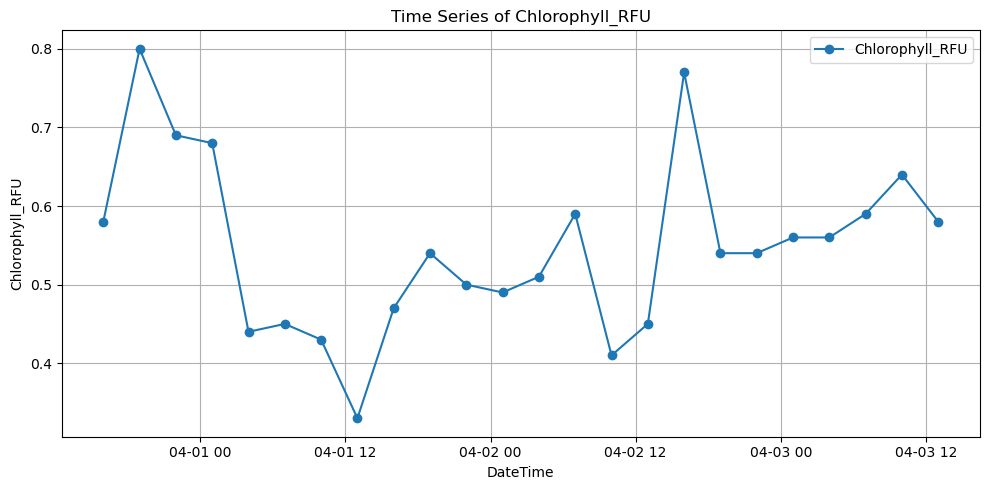

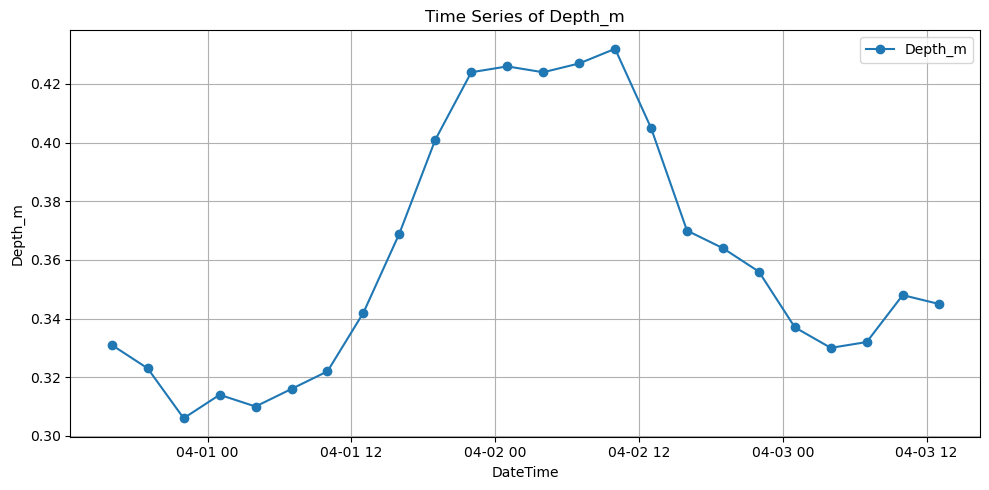

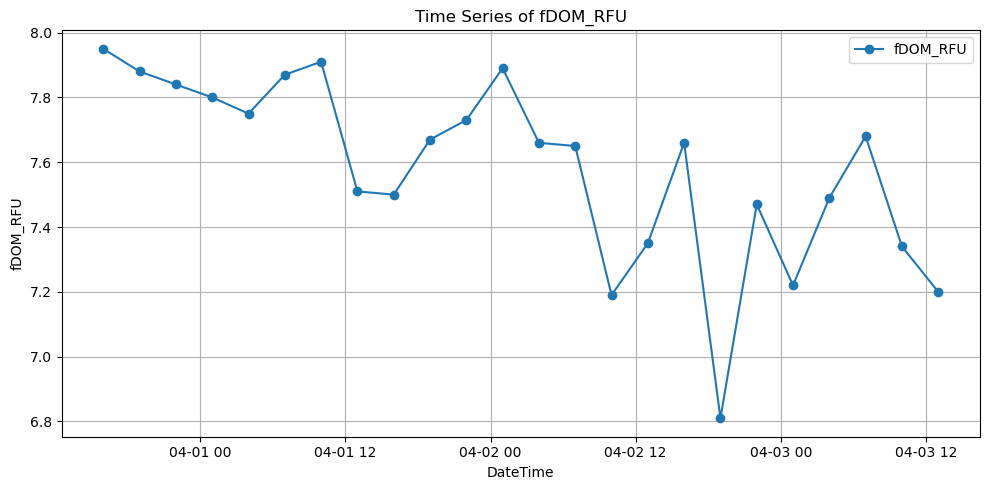

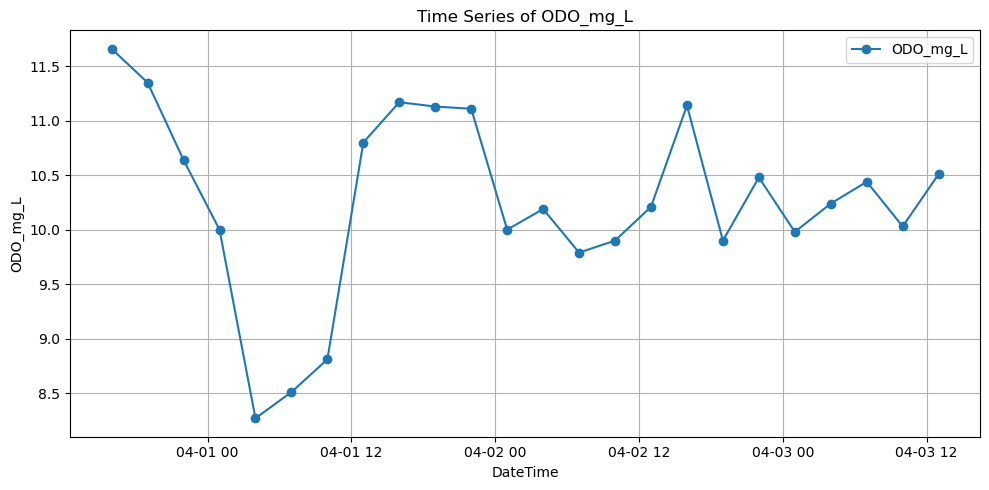

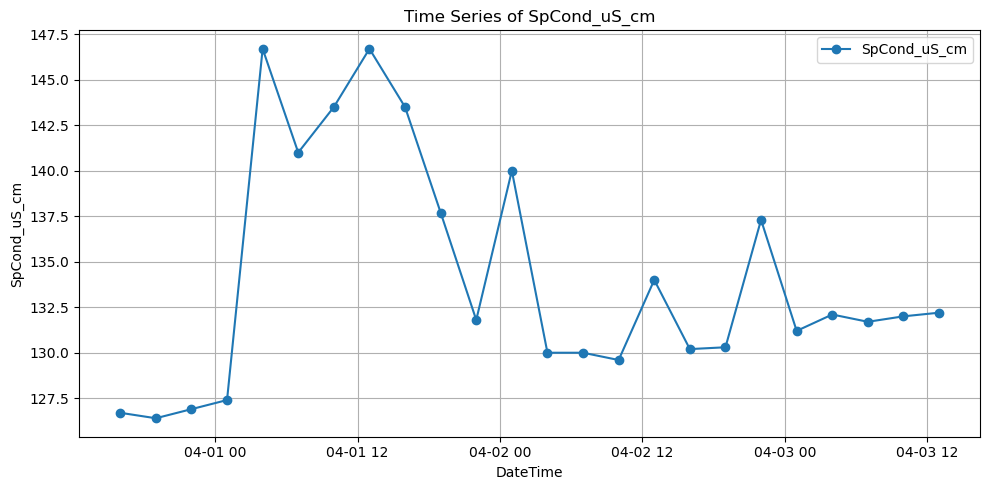

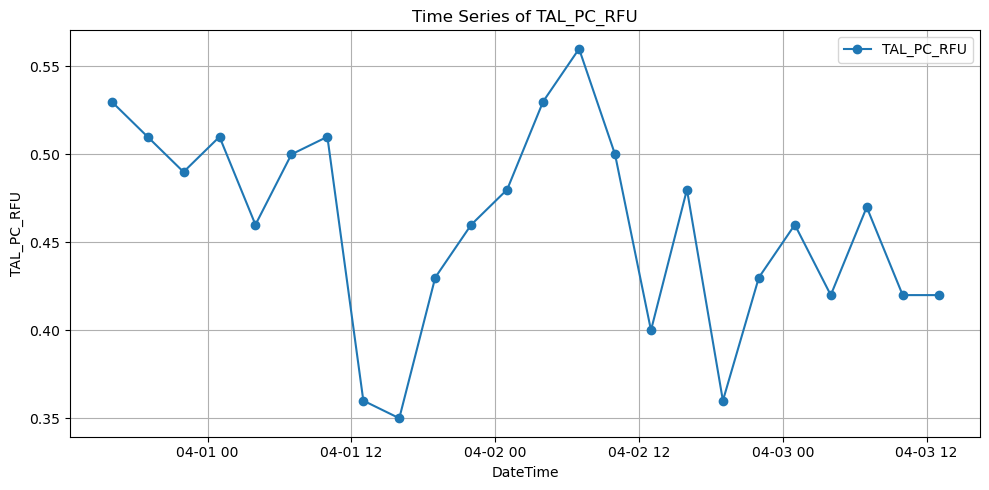

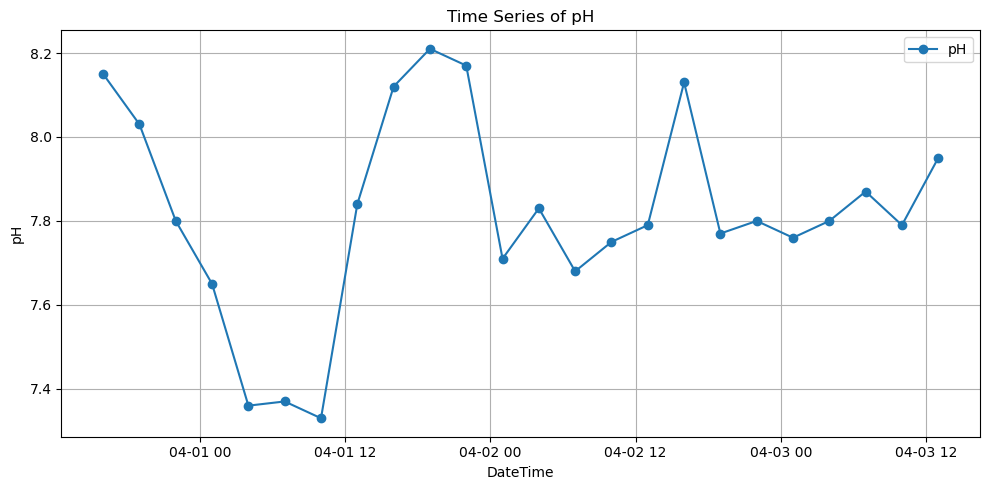

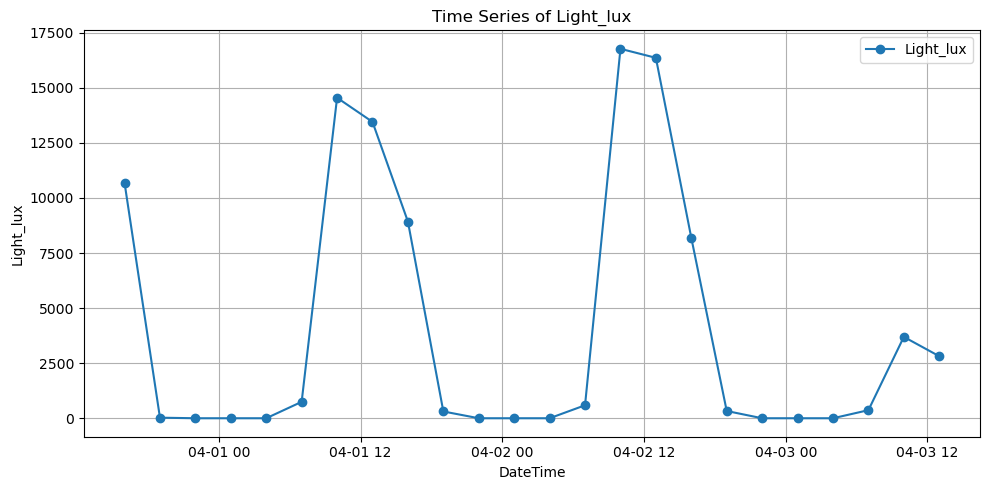

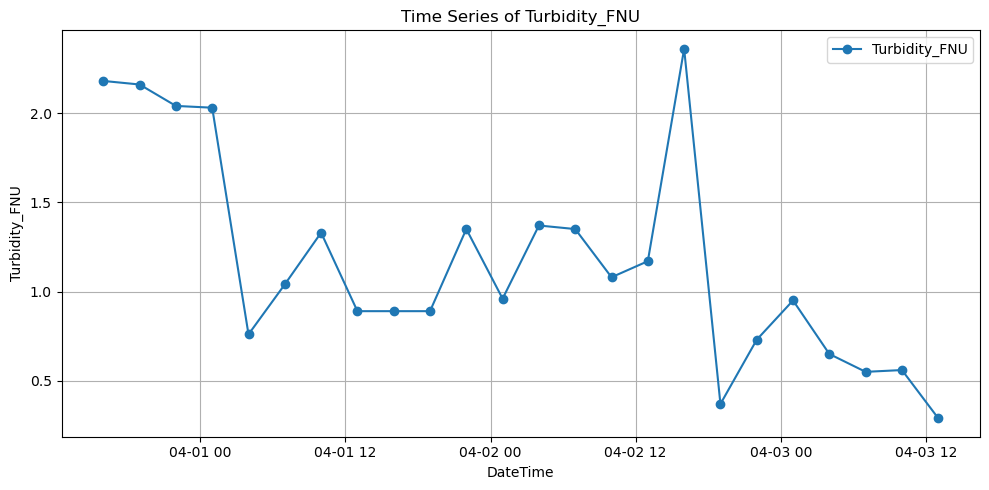

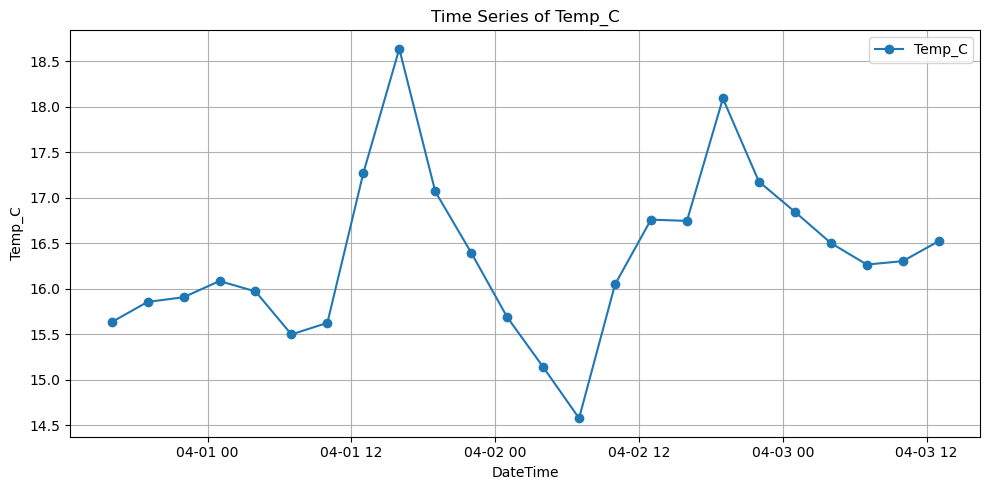

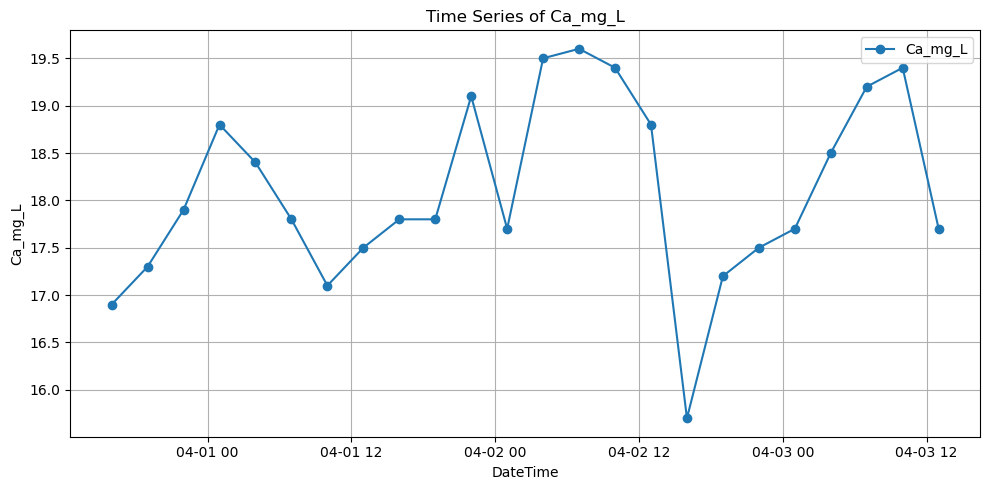

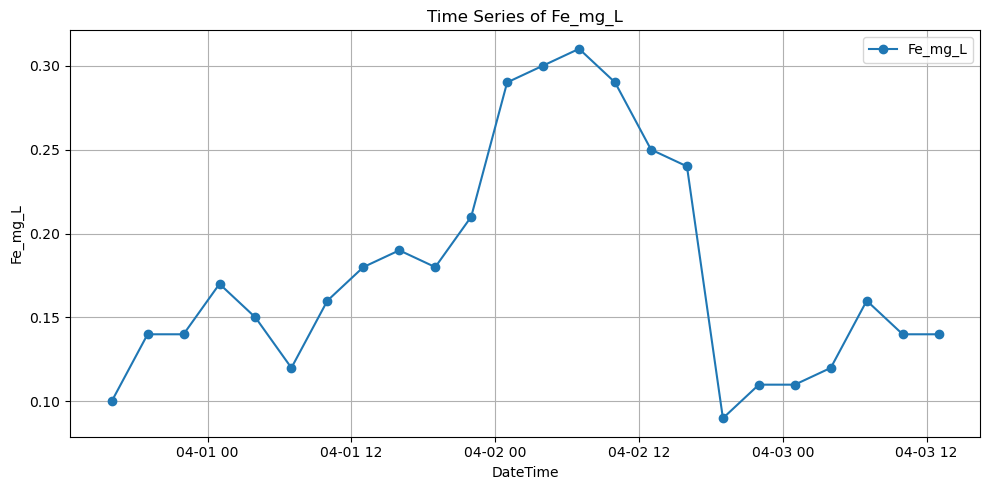

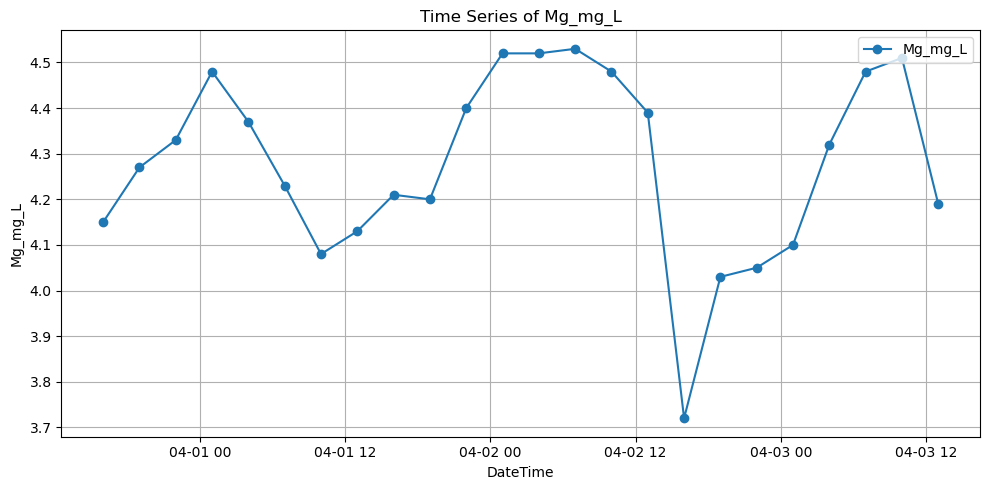

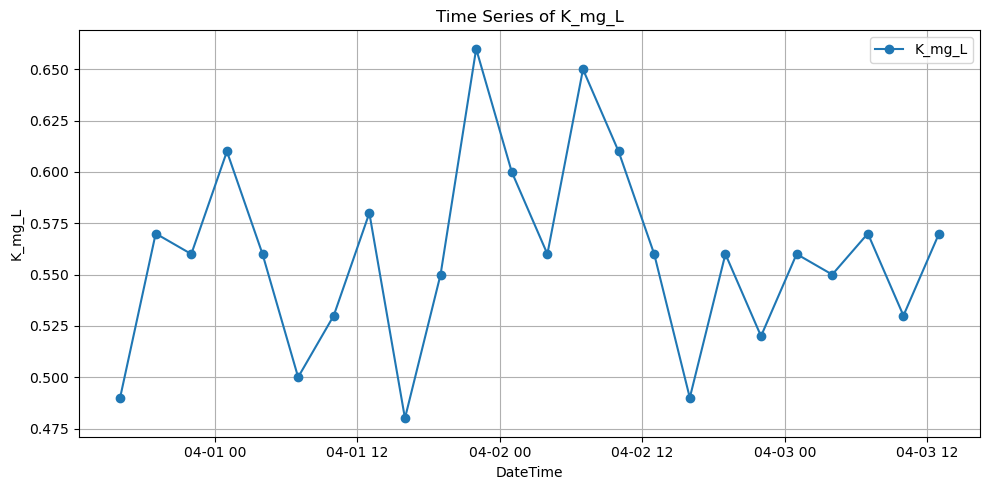

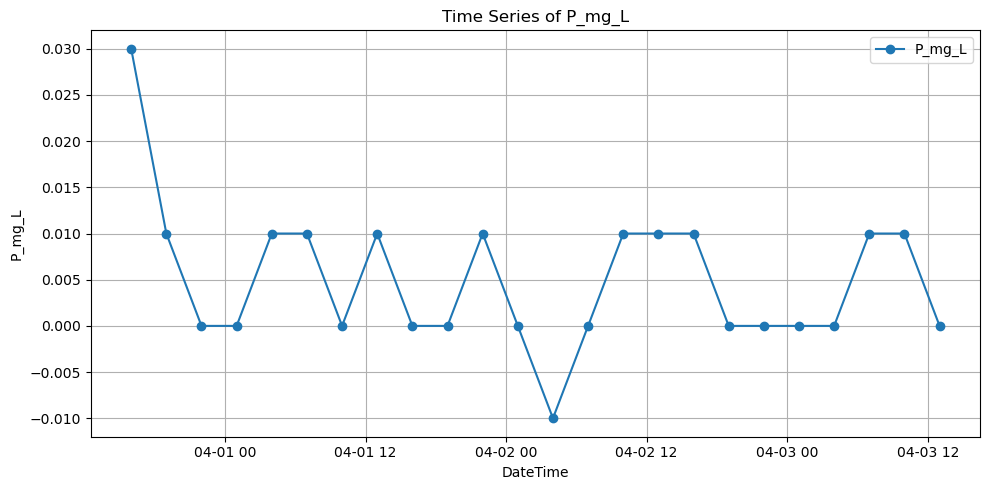

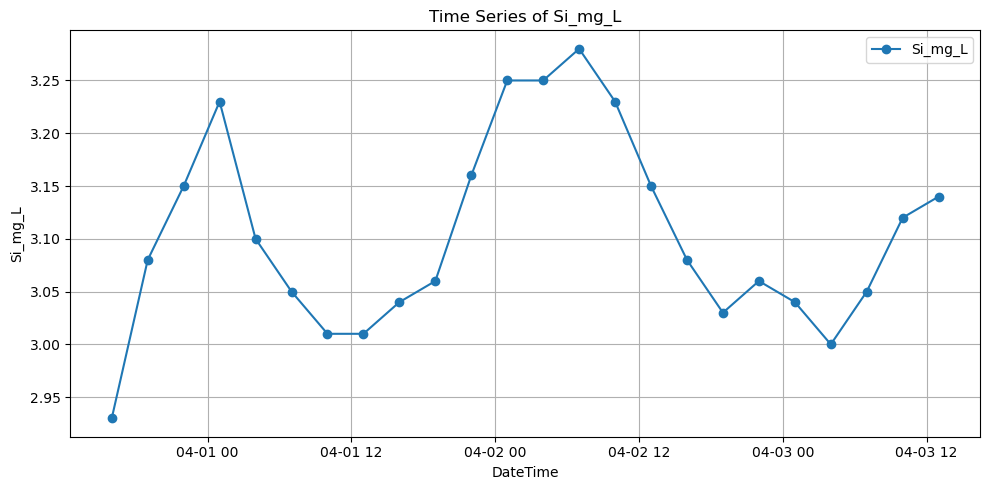

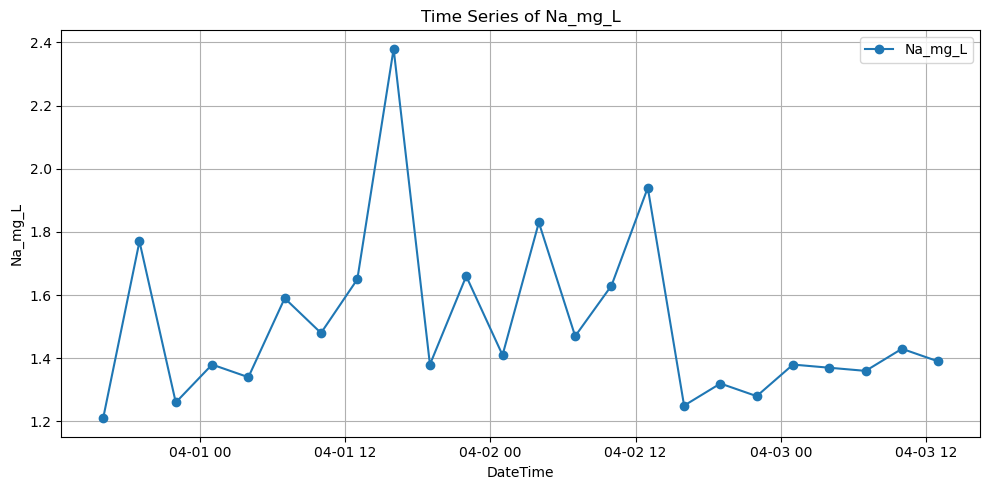

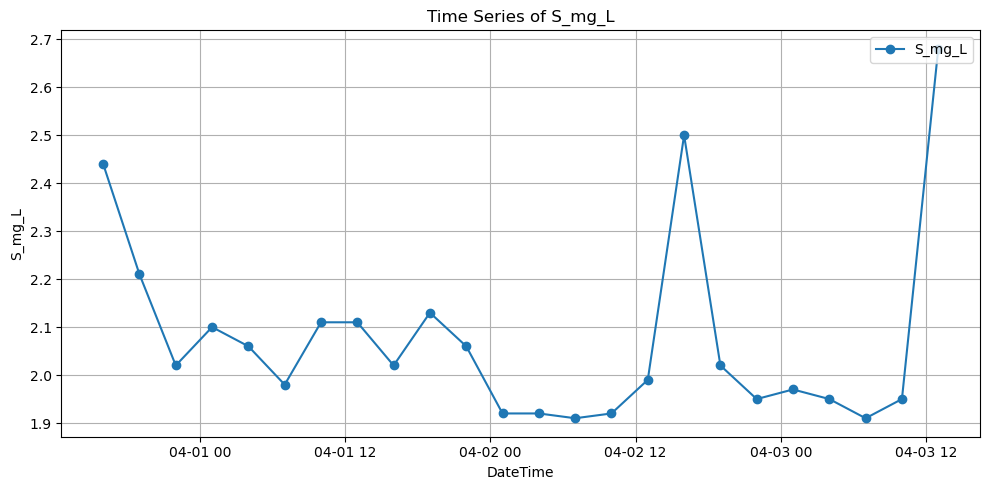

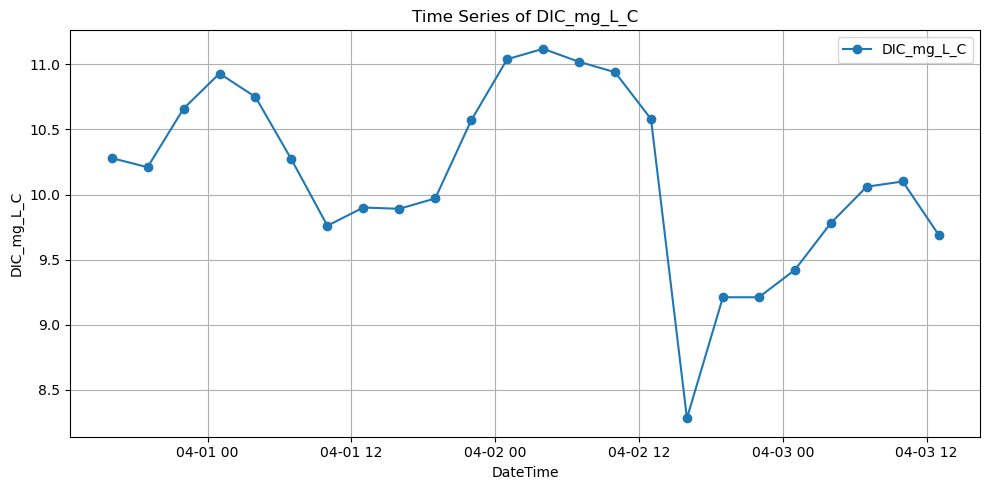

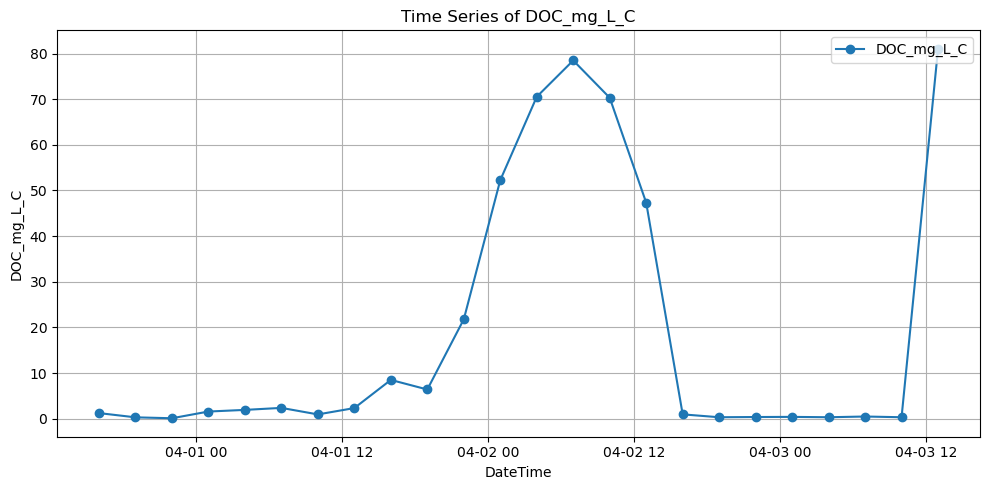

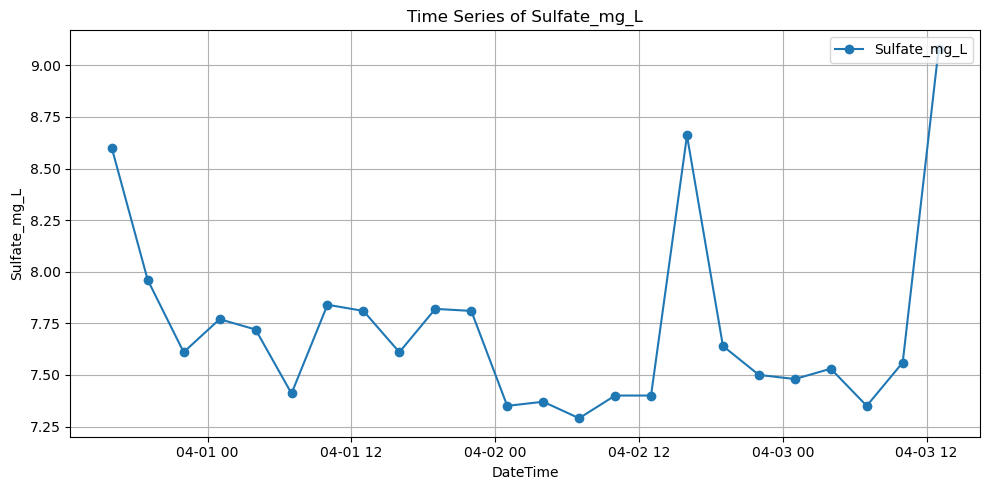

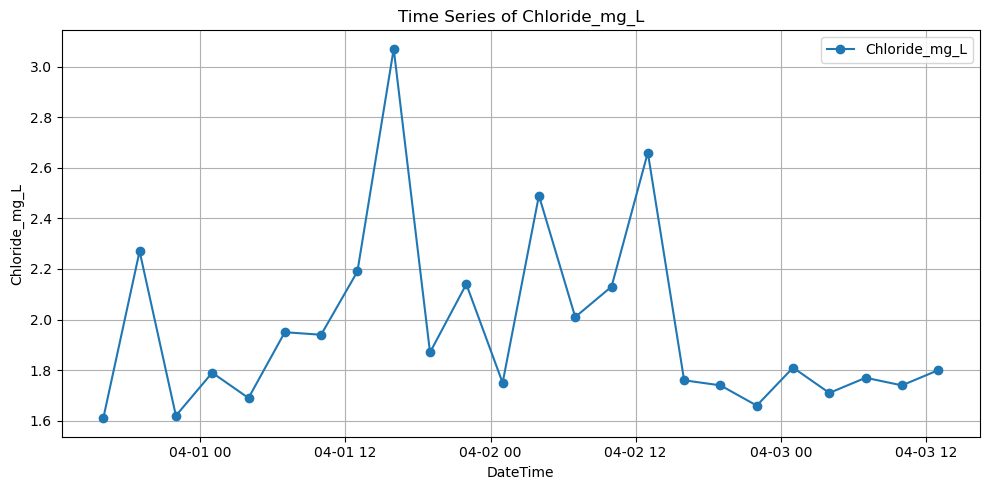

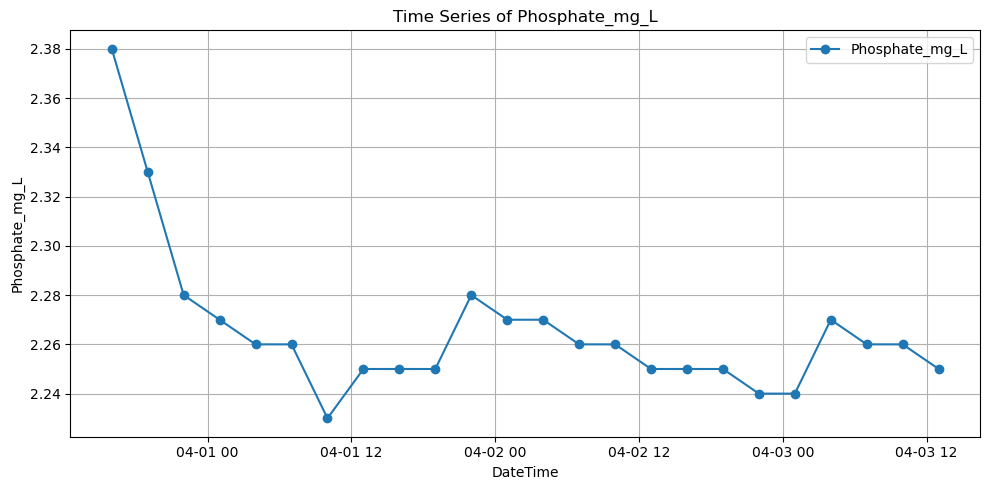

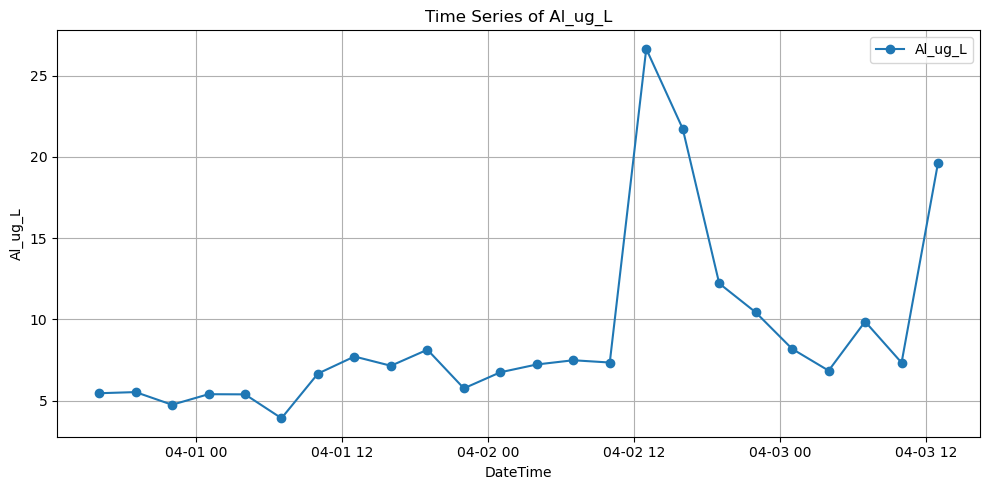

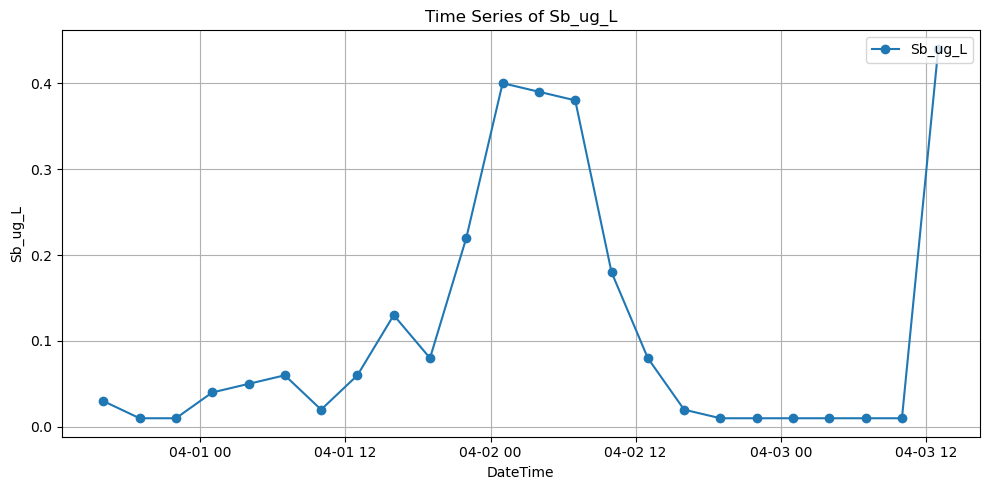

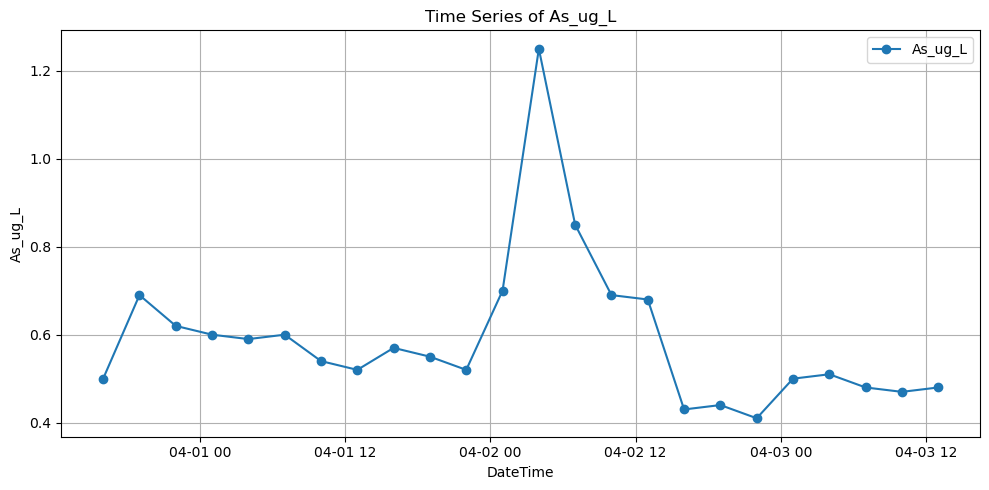

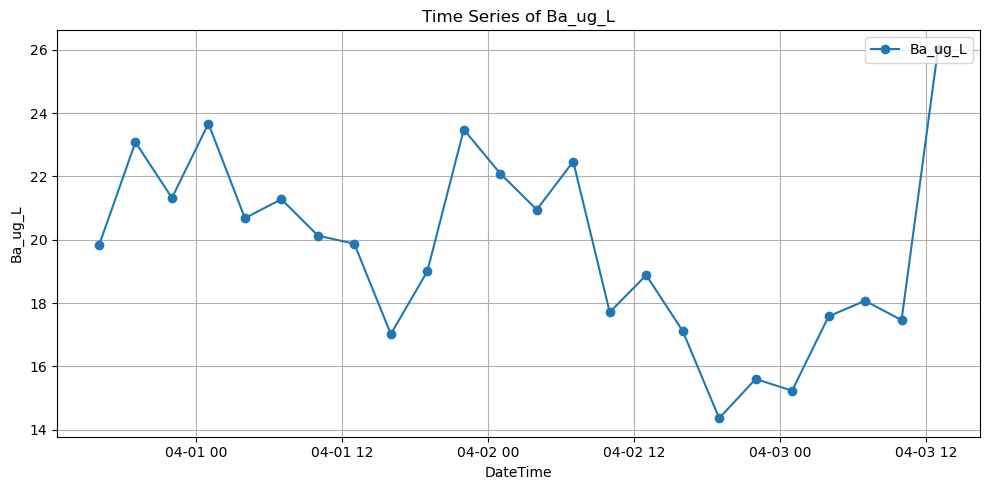

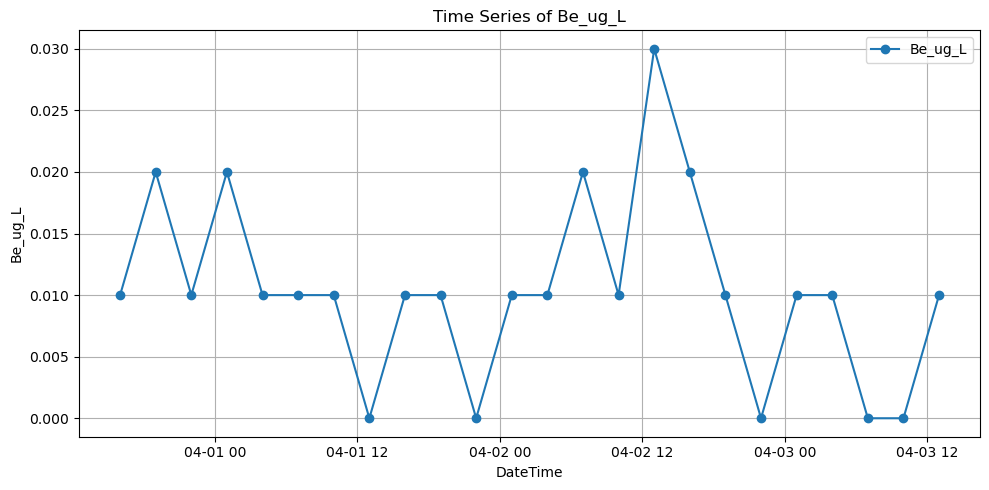

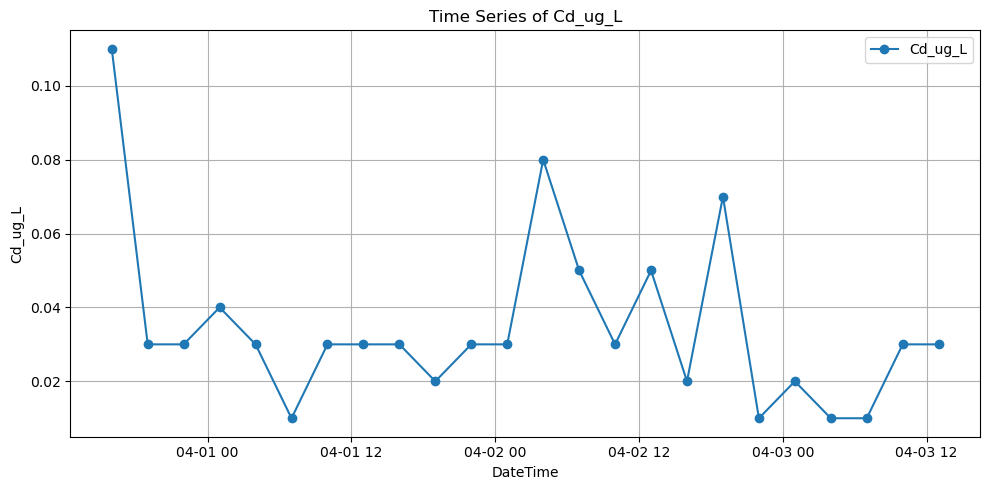

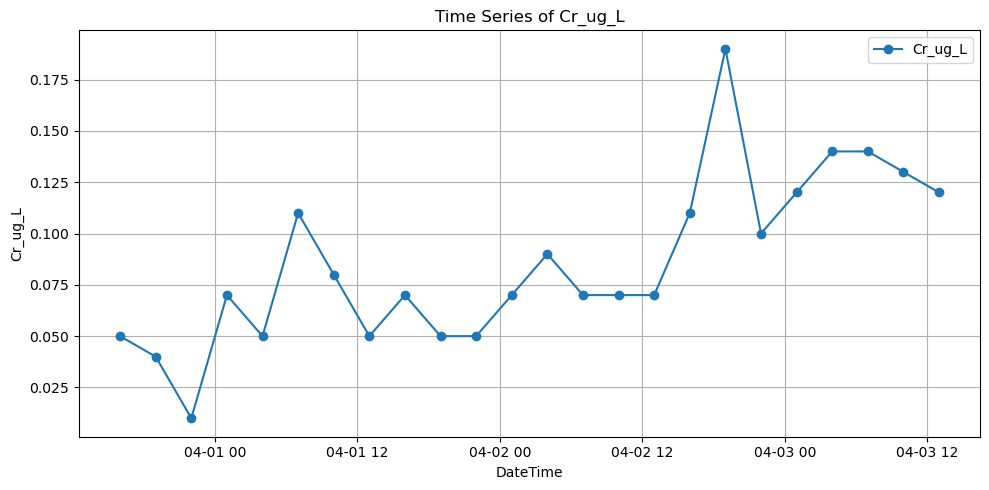

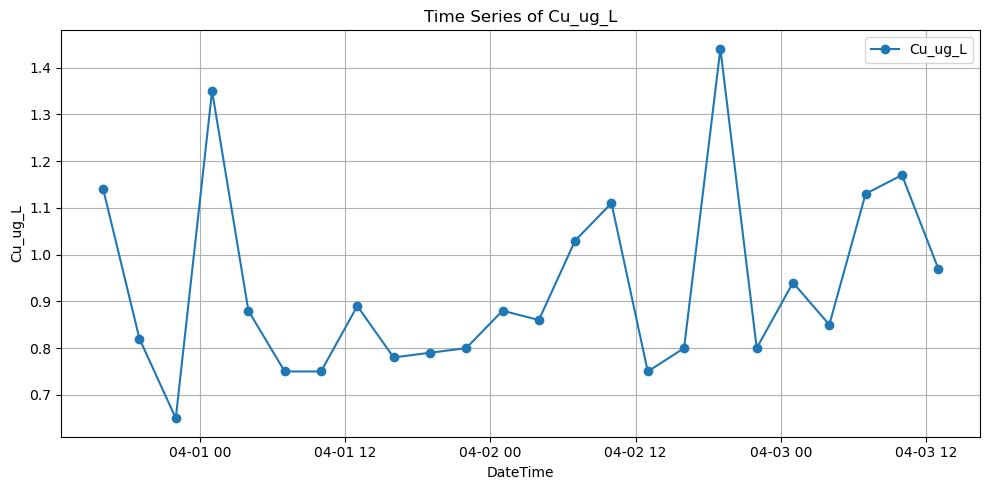

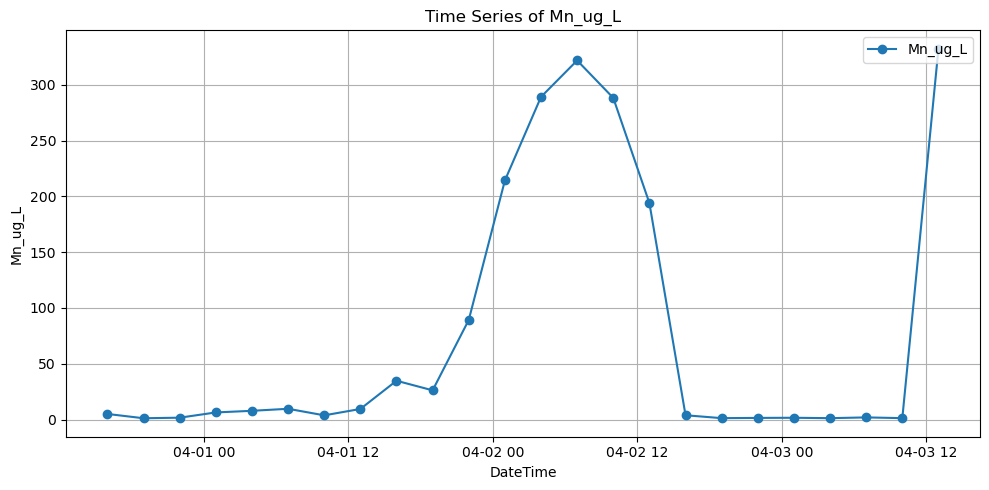

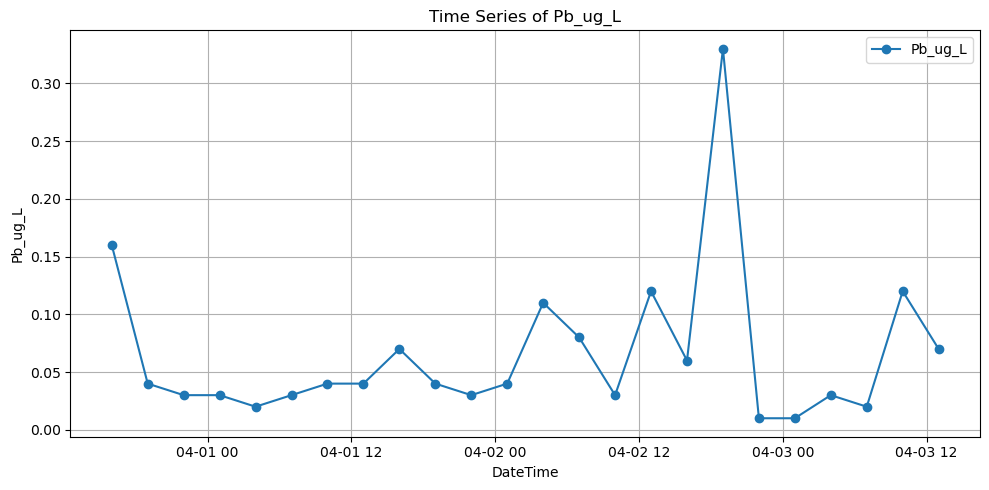

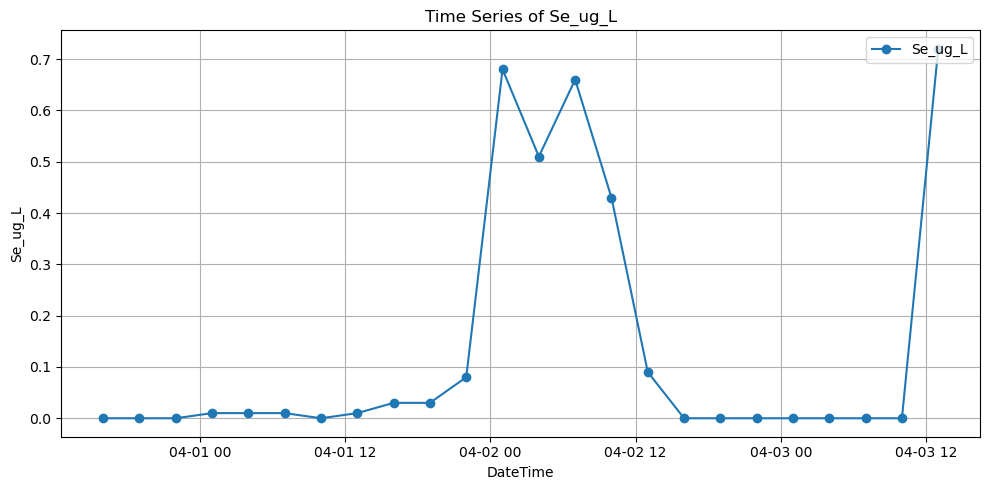

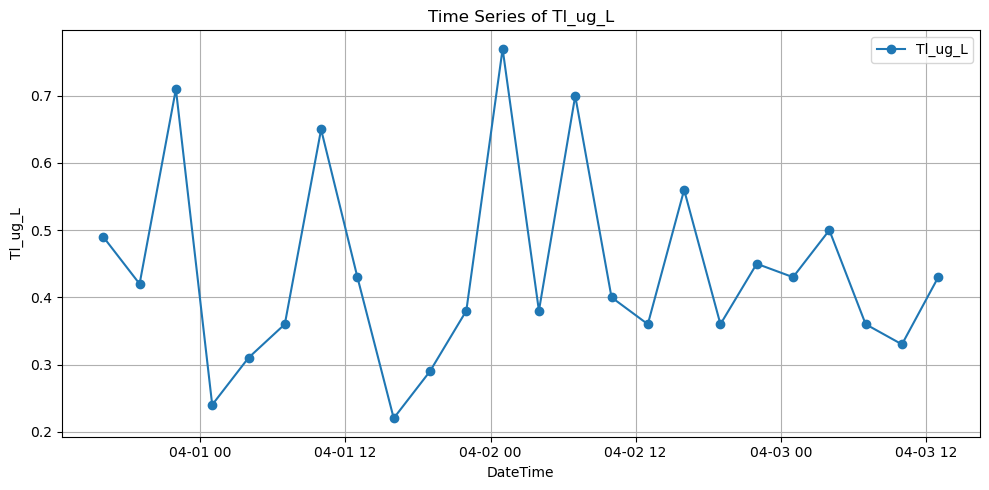

In [16]:
import matplotlib.pyplot as plt

# Convert the 'DateTime' column to datetime data type
df['DateTime'] = pd.to_datetime(df['DateTime'])

# List of specified variables for plotting
specified_columns_plot = [
    'Chlorophyll_RFU', 'Depth_m', 'fDOM_RFU', 'ODO_mg_L', 'SpCond_uS_cm', 'TAL_PC_RFU', 'pH', 
    'Light_lux', 'Turbidity_FNU', 'Temp_C', 'Ca_mg_L', 'Fe_mg_L', 'Mg_mg_L', 'K_mg_L', 'P_mg_L', 
    'Si_mg_L', 'Na_mg_L', 'S_mg_L', 'DIC_mg_L_C', 'DOC_mg_L_C', 'Sulfate_mg_L', 'Chloride_mg_L', 
    'Phosphate_mg_L', 'Al_ug_L', 'Sb_ug_L', 'As_ug_L', 'Ba_ug_L', 'Be_ug_L', 'Cd_ug_L', 'Cr_ug_L', 
    'Cu_ug_L', 'Mn_ug_L', 'Pb_ug_L', 'Se_ug_L', 'Tl_ug_L'
]

# Directory to save PNG images
img_dir_plot = "202304_SL_TimeSeriesPlots"
os.makedirs(img_dir_plot, exist_ok=True)

# Save each plot as a PNG image
for col in specified_columns_plot:
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.plot(df['DateTime'], df[col], marker='o', linestyle='-', label=col)
    ax.set_title(f'Time Series of {col}')
    ax.set_xlabel('DateTime')
    ax.set_ylabel(col)
    ax.legend(loc='upper right')
    ax.grid(True)
    fig.savefig(os.path.join(img_dir_plot, f"{col}_TimeSeries.png"))
    plt.tight_layout()
    plt.show()
    plt.close(fig)

# Compress all PNG images into a ZIP file
# zip_file_path_plot = "202304_SL_SpecifiedTimeSeriesPlots.zip"
# with zipfile.ZipFile(zip_file_path_plot, 'w') as zipf:
  #  for root, _, files in os.walk(img_dir_plot):
   #     for file in files:
    #        zipf.write(os.path.join(root, file), file)

# zip_file_path_plot


In [17]:
import os
import zipfile

# Directory to save PNG images
img_dir = "202304_SL_TimeSeriesPlots"
os.makedirs(img_dir, exist_ok=True)

# Save each plot as a PNG image
for i, col in enumerate(numerical_columns):
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.plot(df['DateTime'], df[col], marker='o', linestyle='-', label=col)
    ax.set_title(f'Time Series of {col}')
    ax.set_xlabel('DateTime')
    ax.set_ylabel(col)
    ax.legend(loc='upper right')
    ax.grid(True)
    fig.savefig(os.path.join(img_dir, f"{col}_TimeSeries.png"))
    plt.close(fig)

# Compress all PNG images into a ZIP file
# zip_file_path = "202304_SL_TimeSeriesPlots.zip"
# with zipfile.ZipFile(zip_file_path, 'w') as zipf:
   # for root, _, files in os.walk(img_dir):
   #     for file in files:
   #         zipf.write(os.path.join(root, file), file)

# zip_file_path


NameError: name 'numerical_columns' is not defined

In [ ]:
# Compute summary statistics for the specified variables
summary_statistics = df[specified_columns_plot].describe().transpose()
summary_statistics

In [ ]:
import seaborn as sns

# Calculate the correlation matrix
correlation_matrix = df[specified_columns_plot].corr()

# Display the correlation matrix
correlation_matrix


In [ ]:
# Plot a heatmap of the correlation matrix
plt.figure(figsize=(16, 14))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

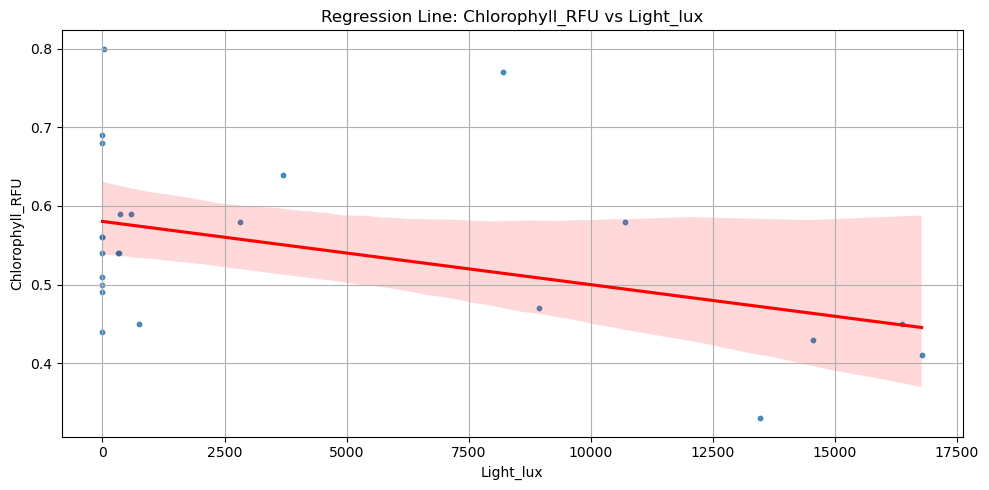

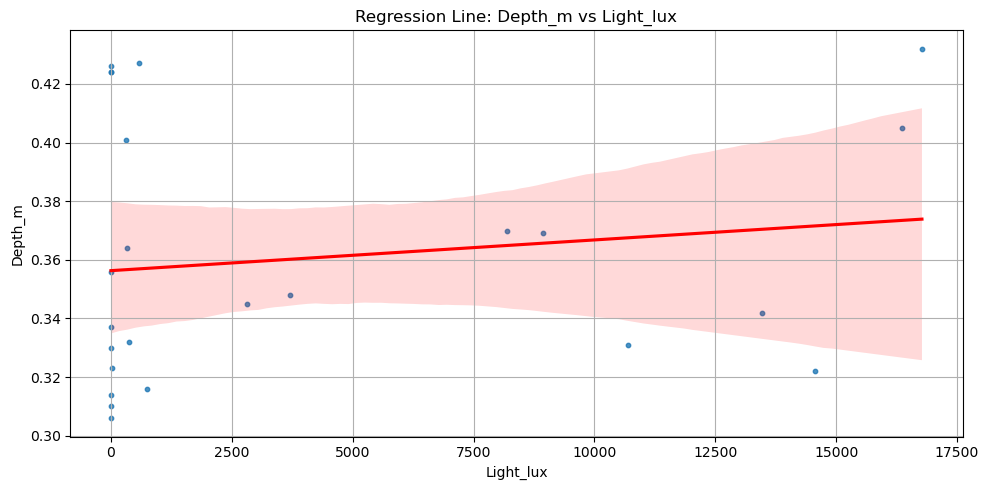

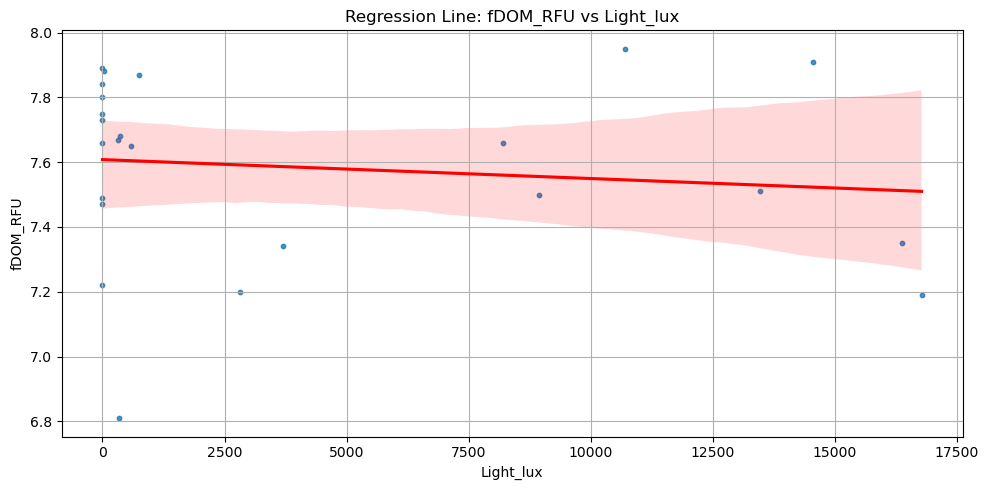

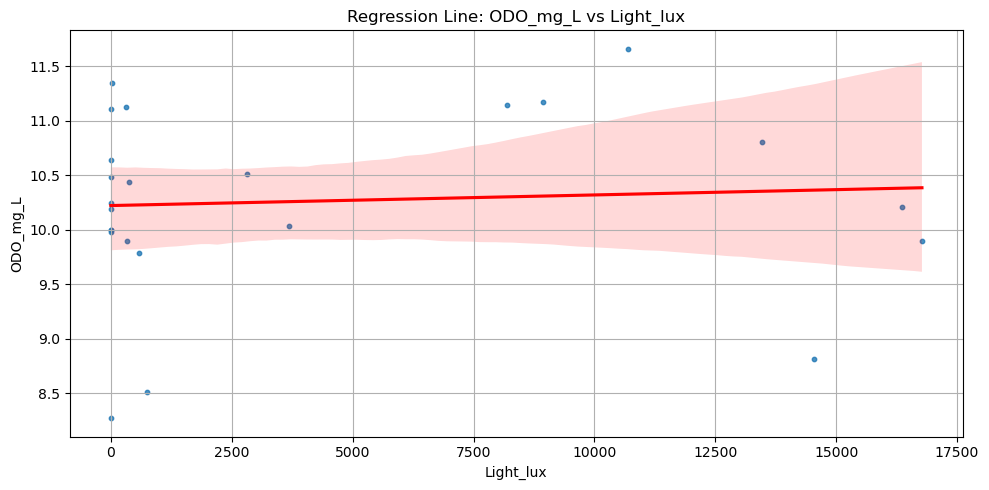

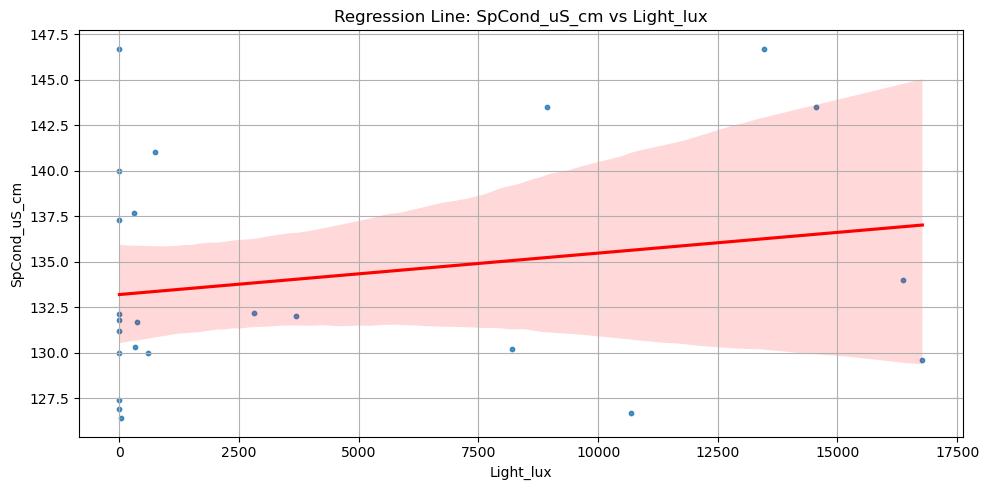

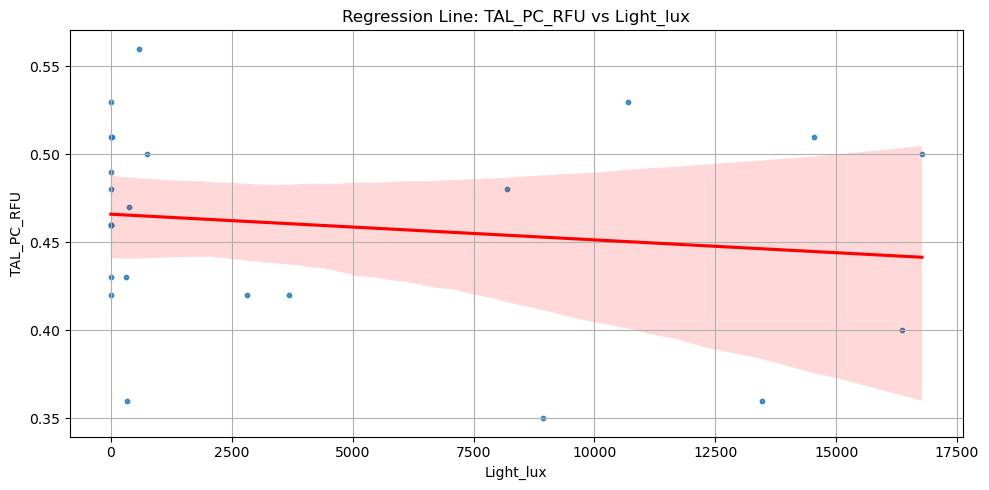

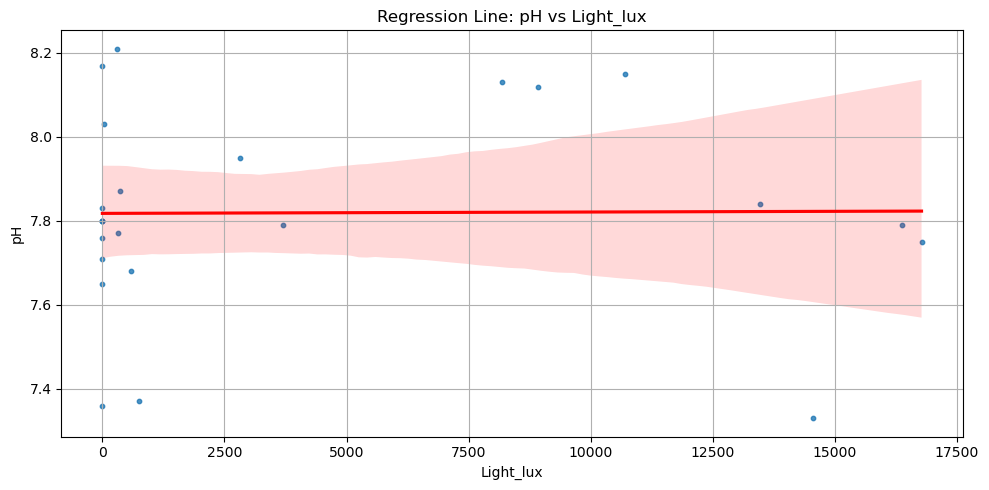

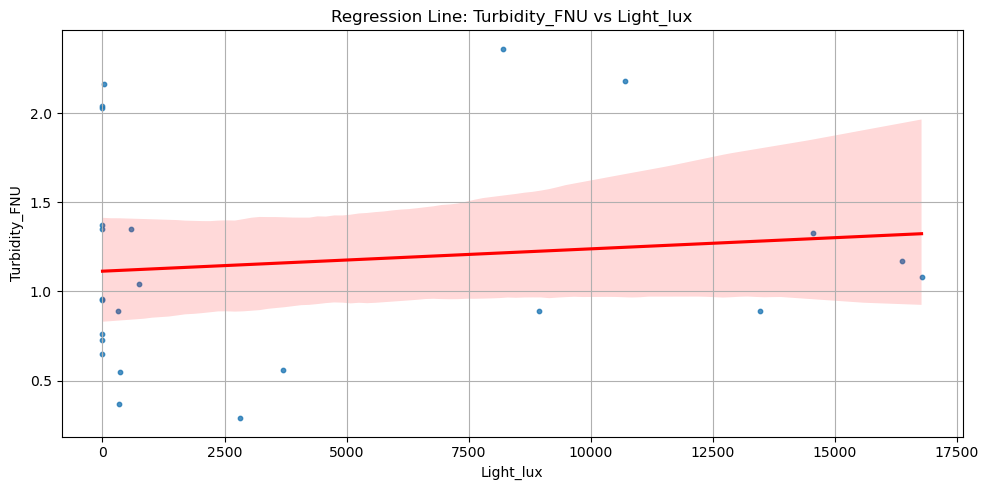

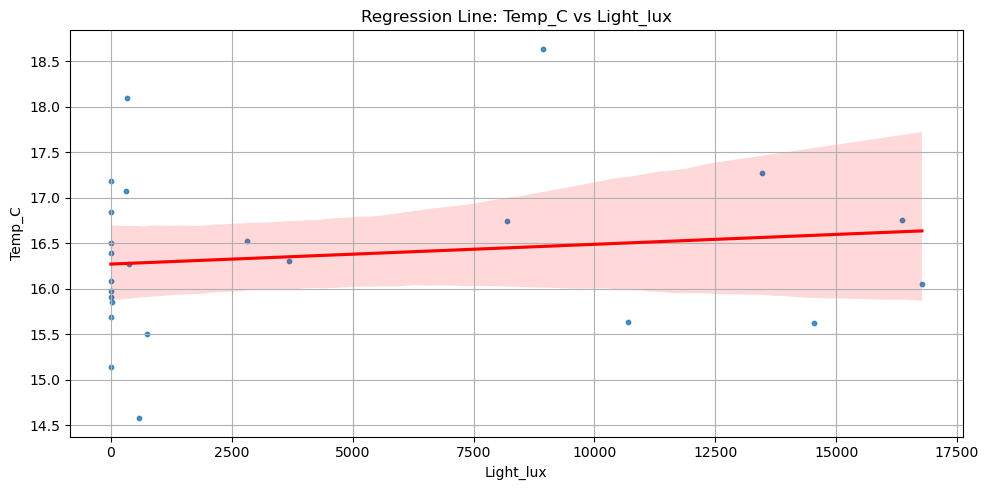

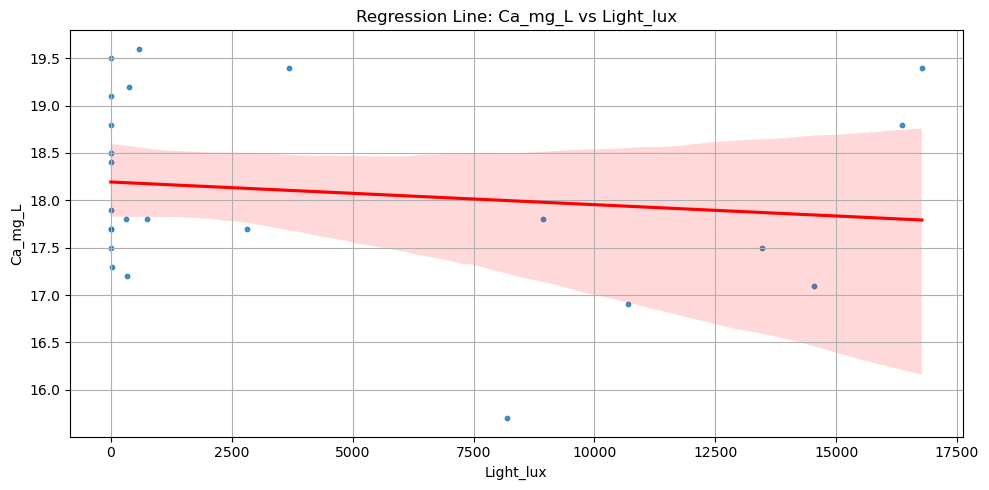

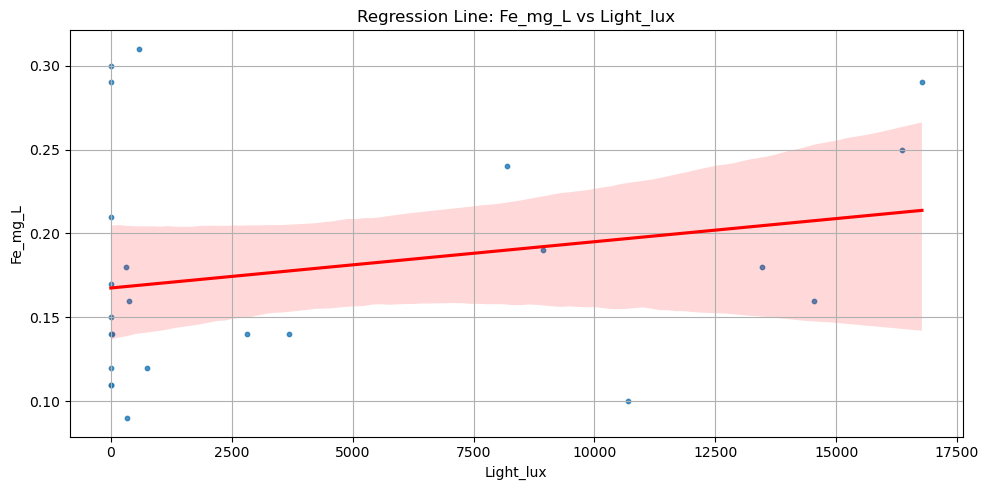

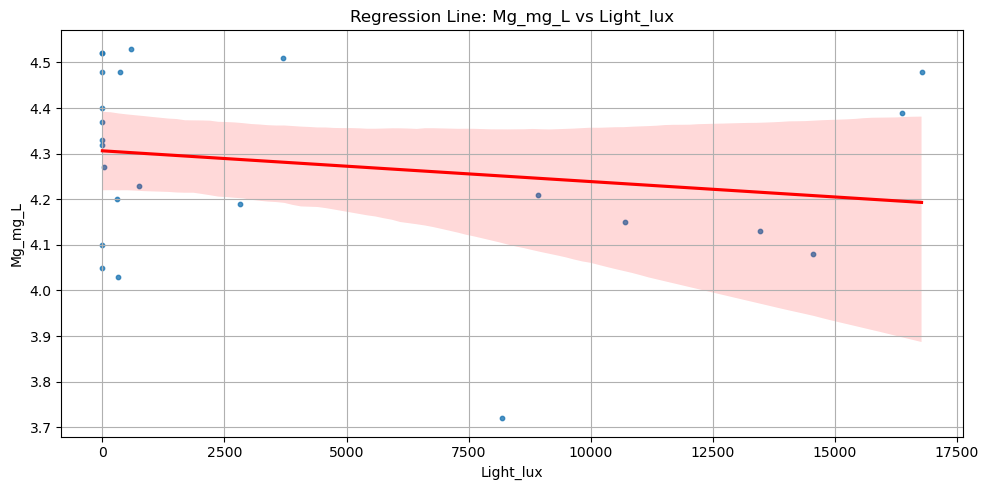

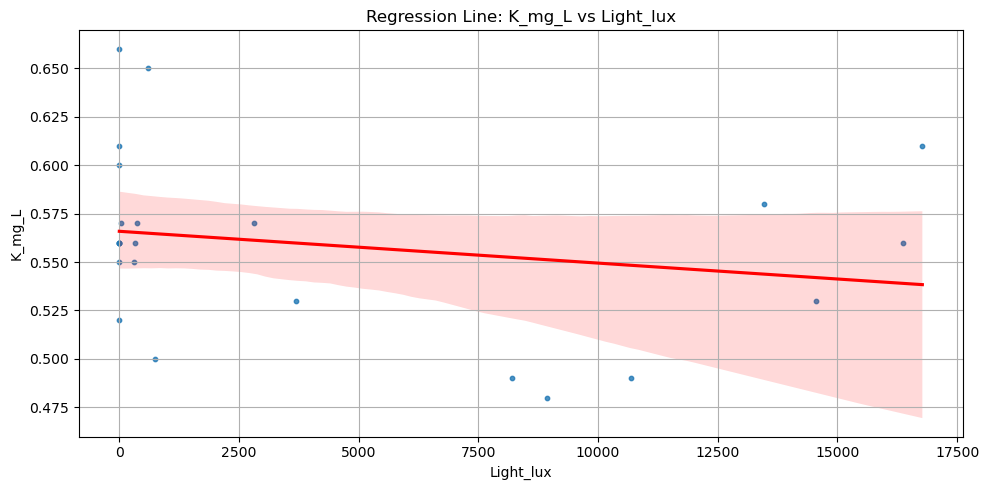

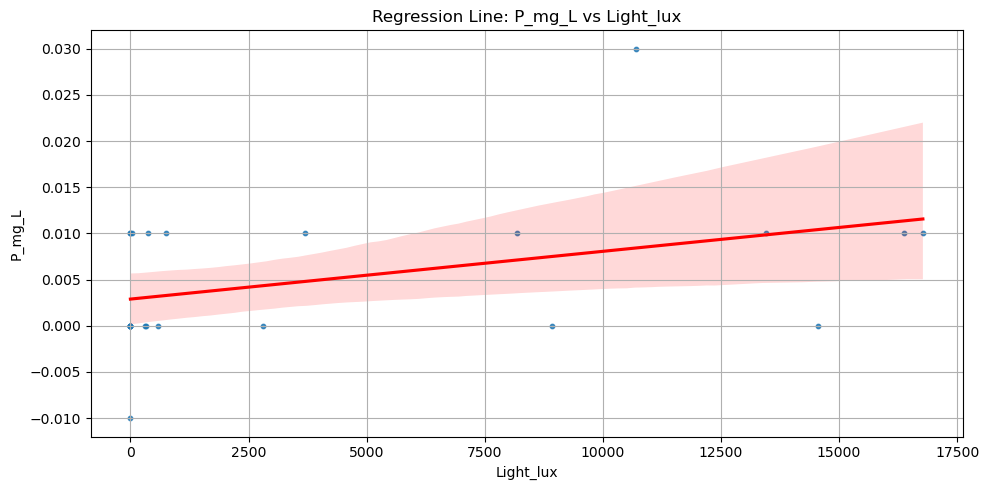

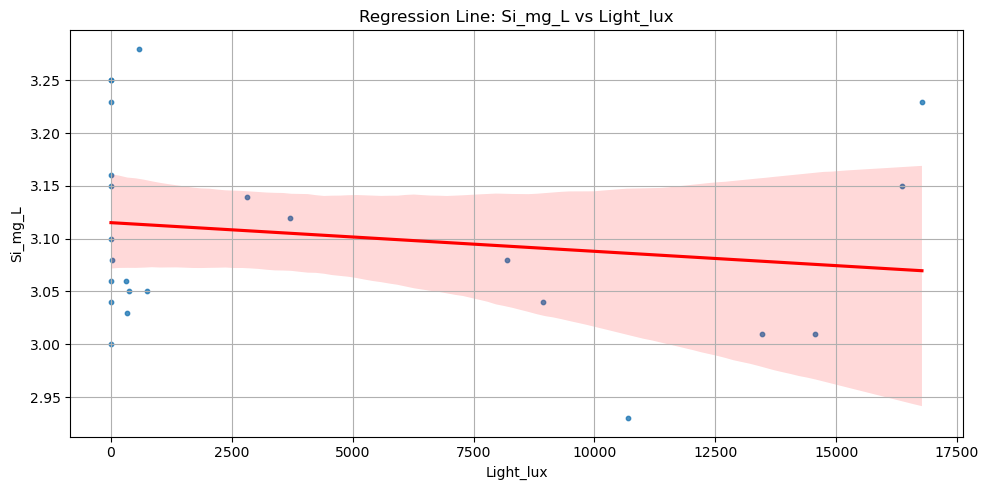

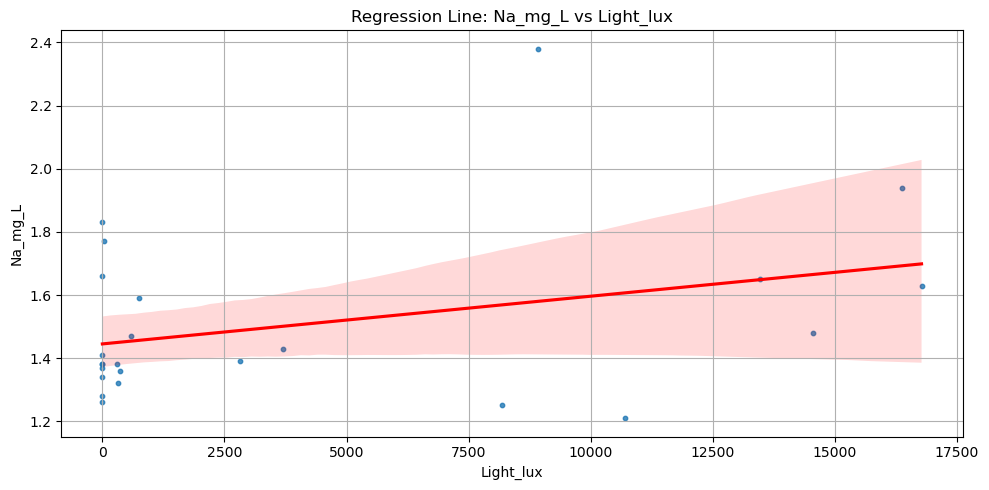

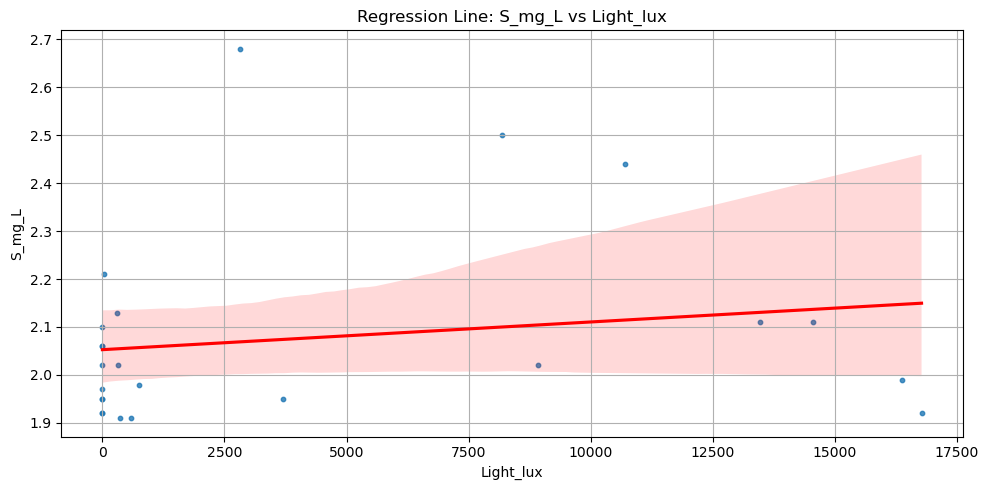

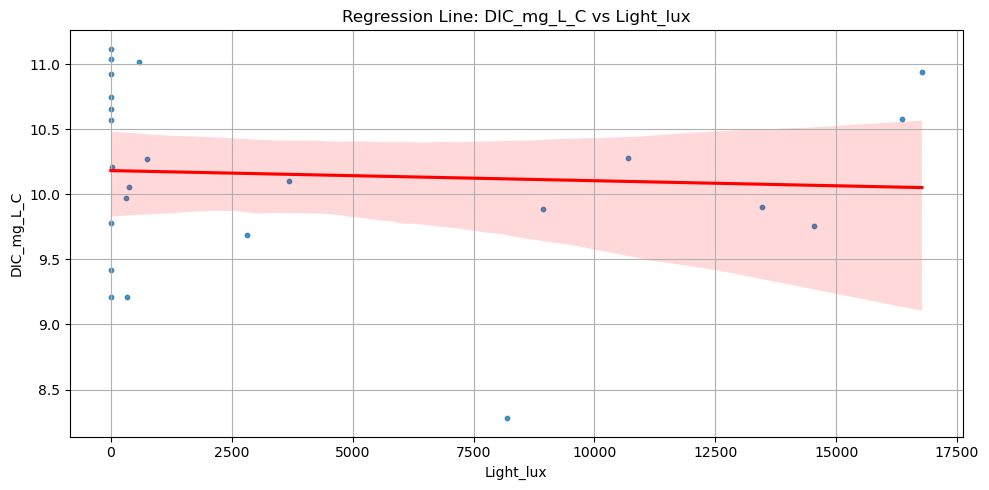

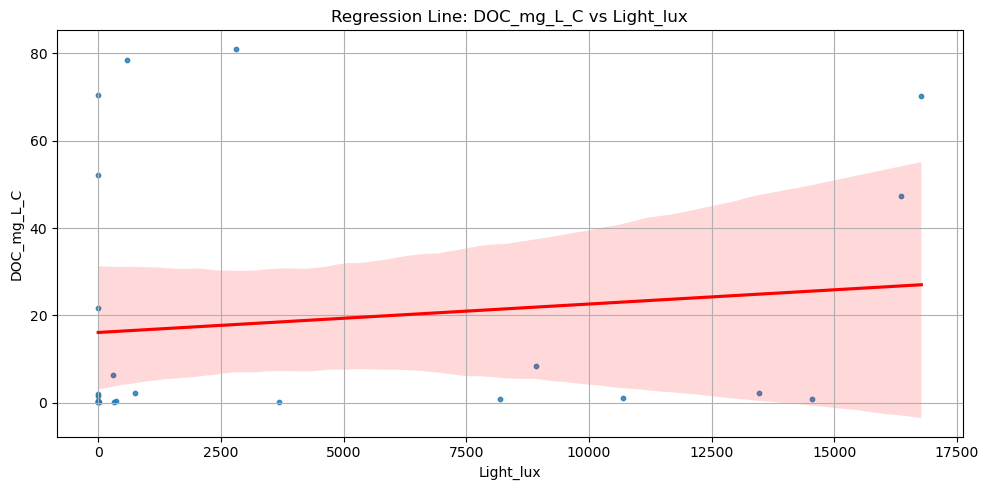

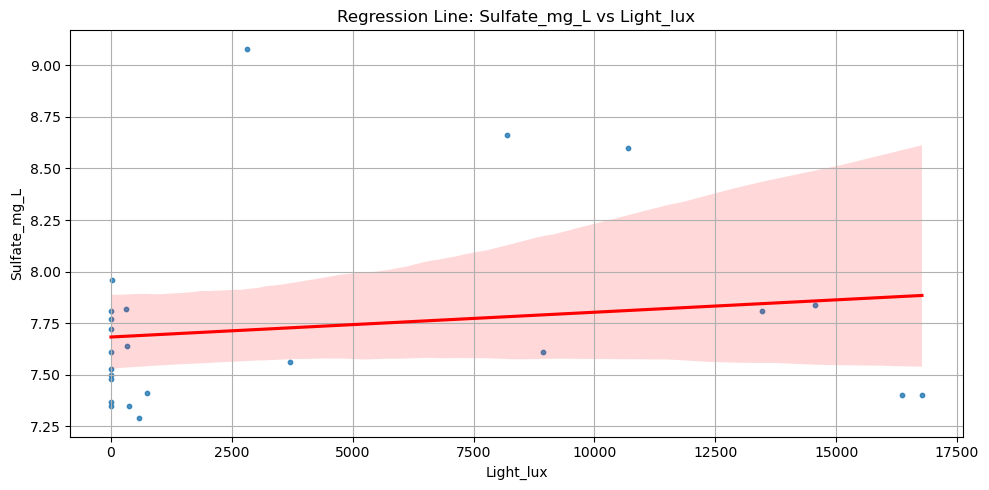

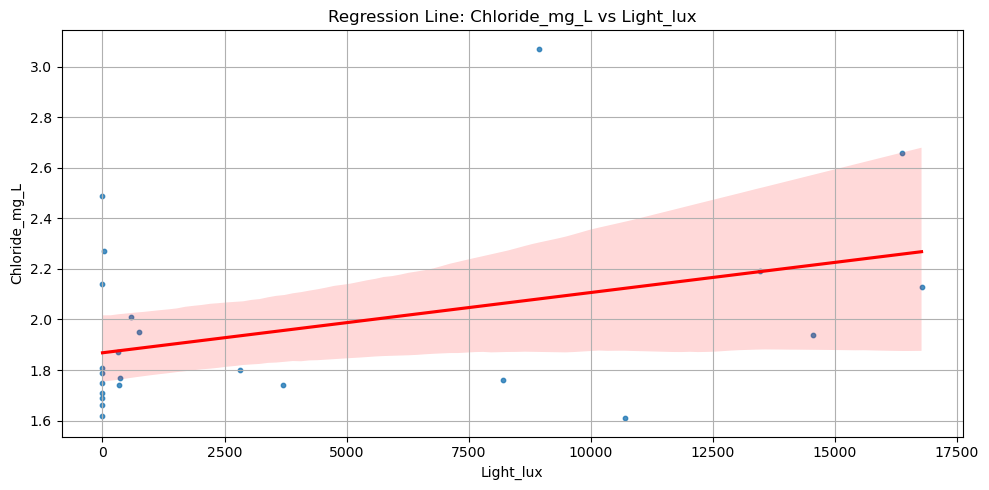

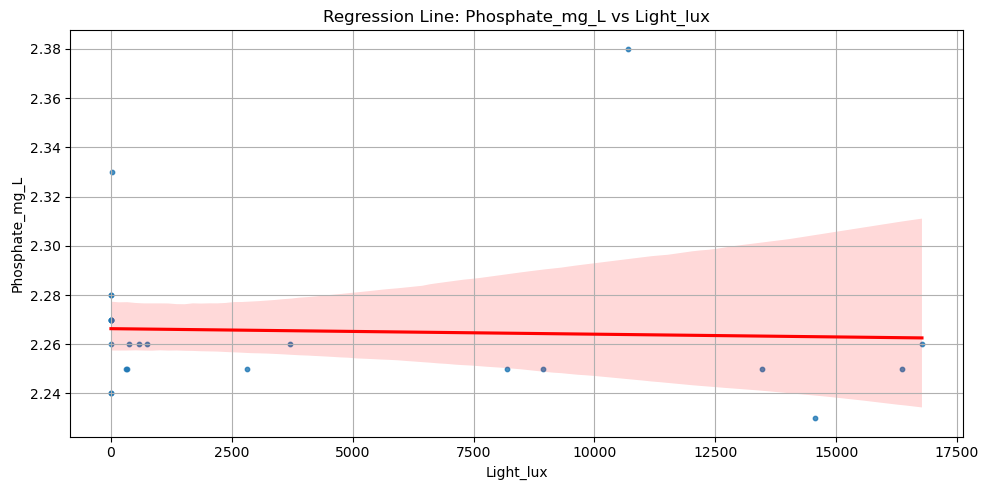

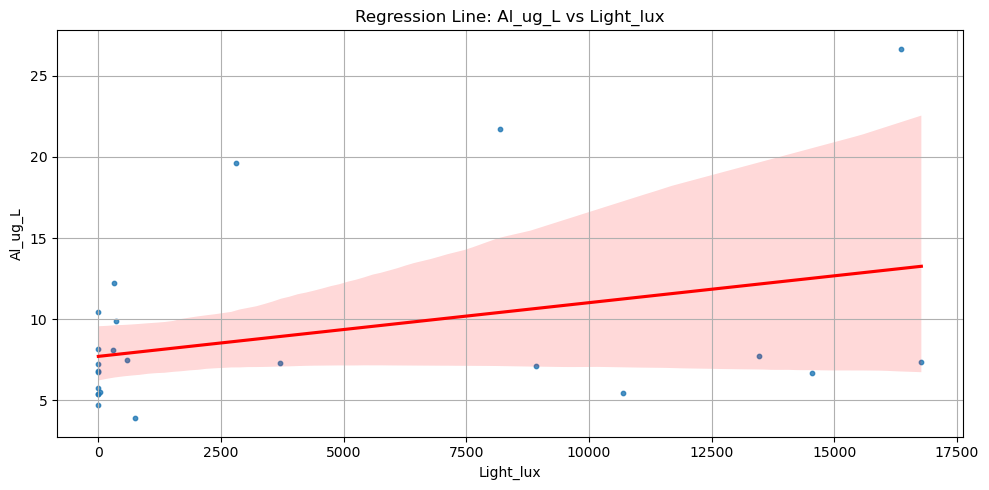

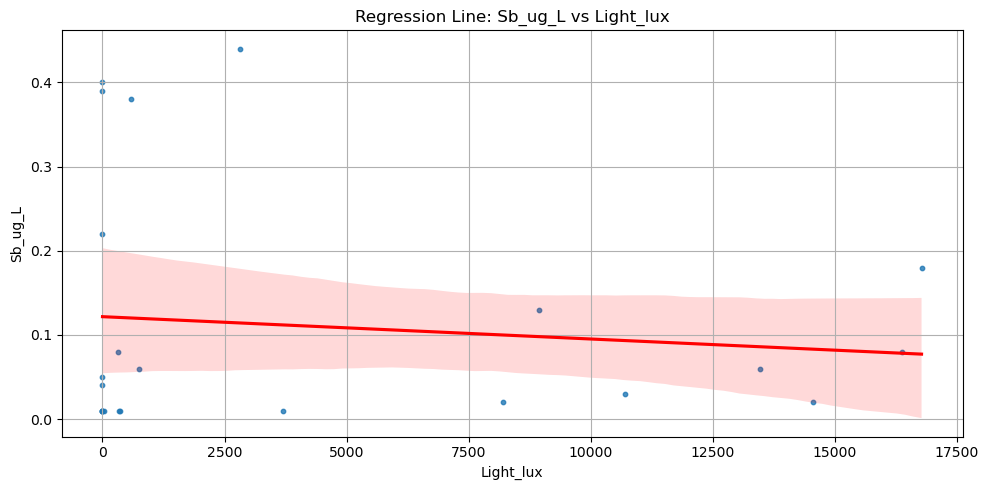

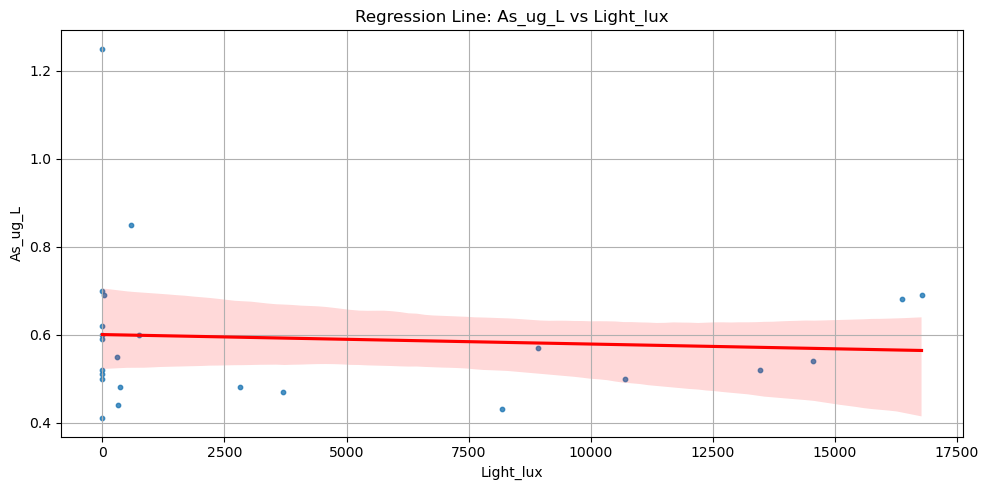

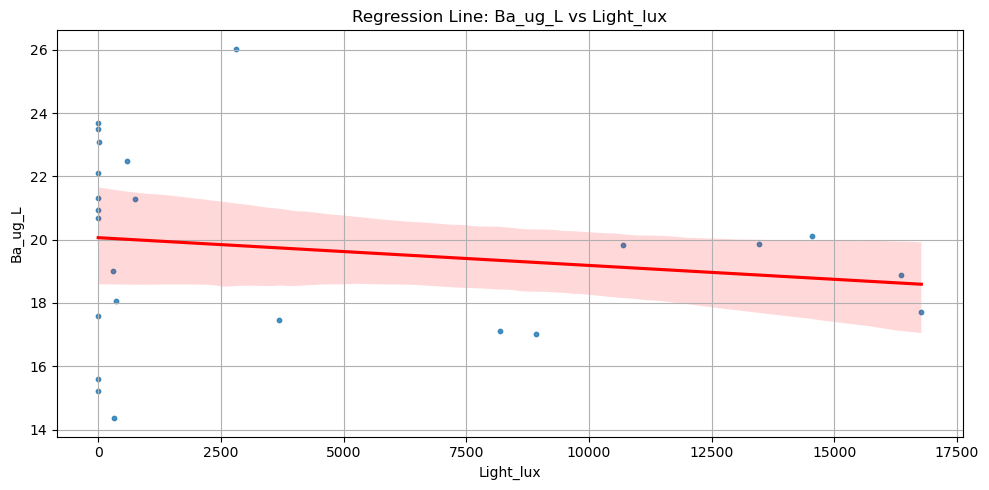

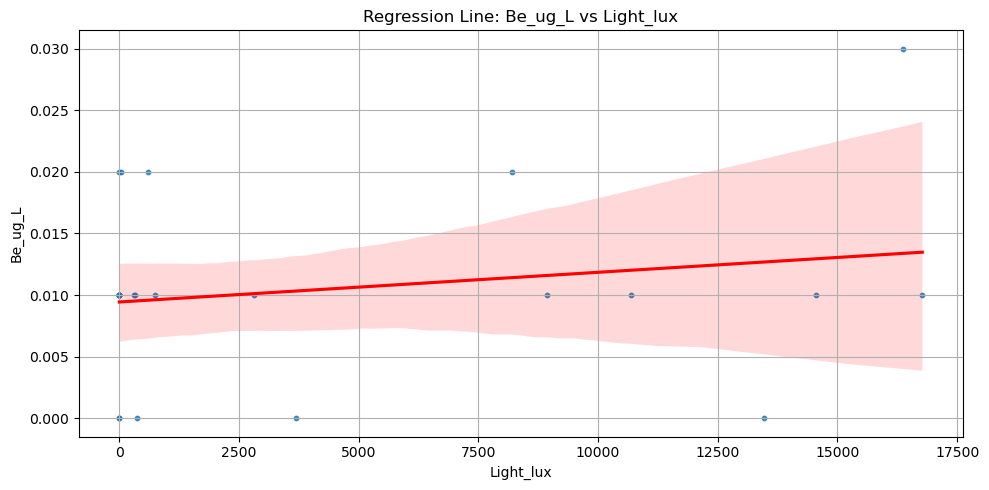

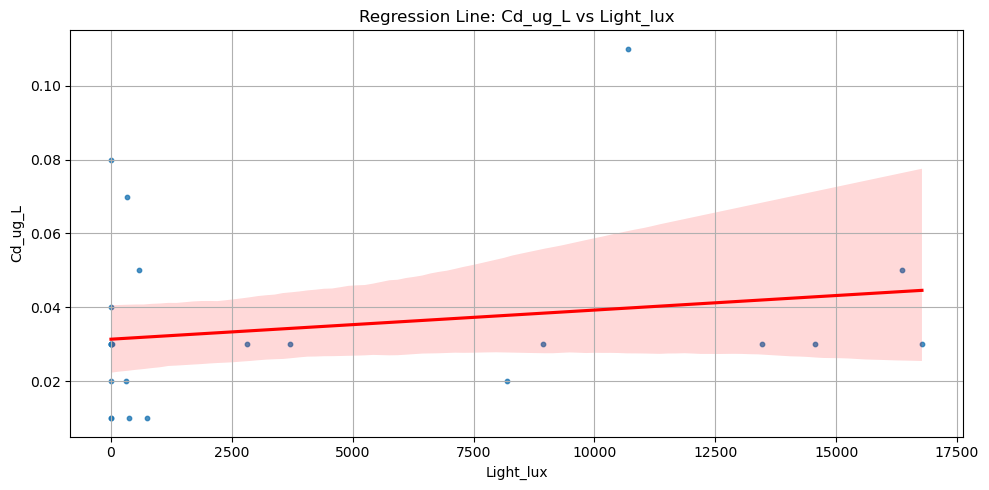

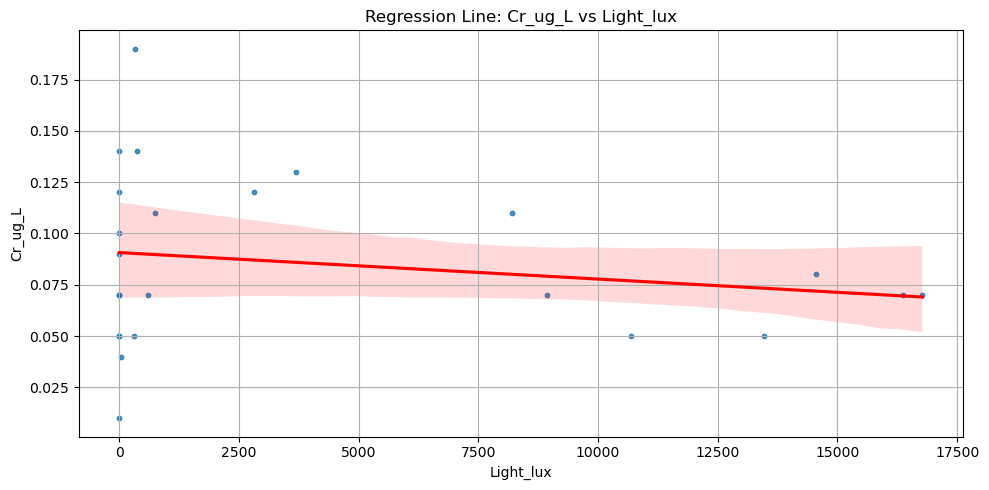

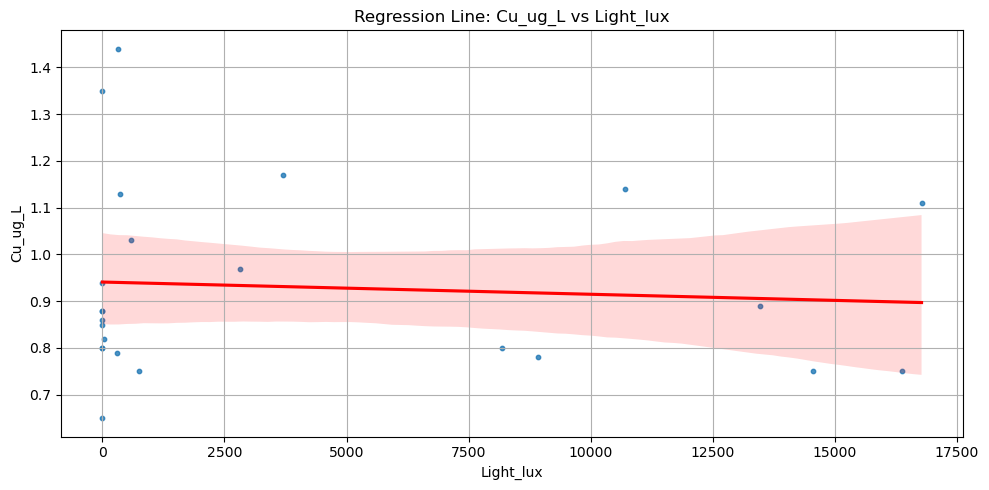

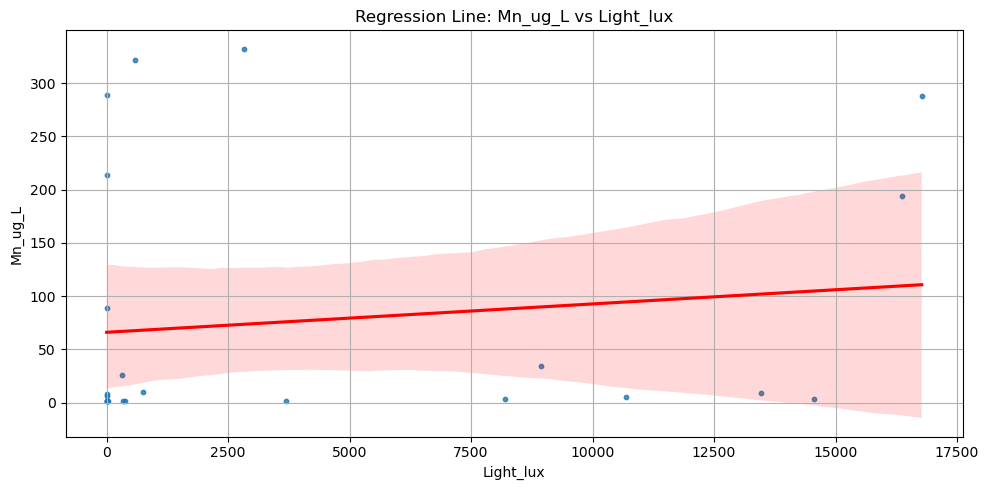

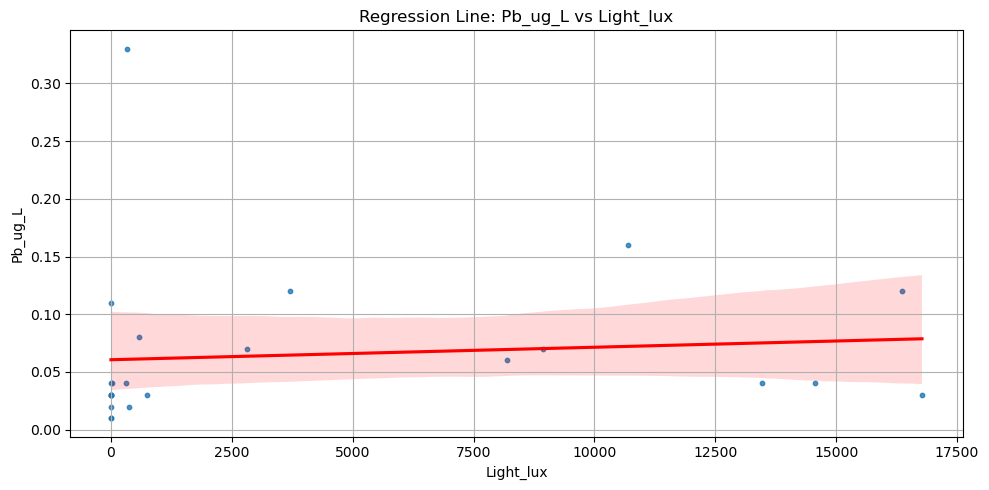

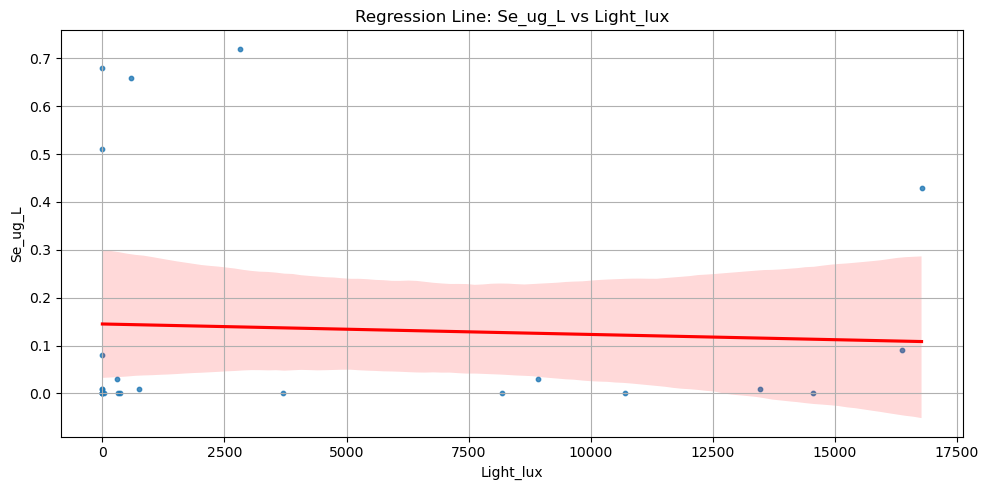

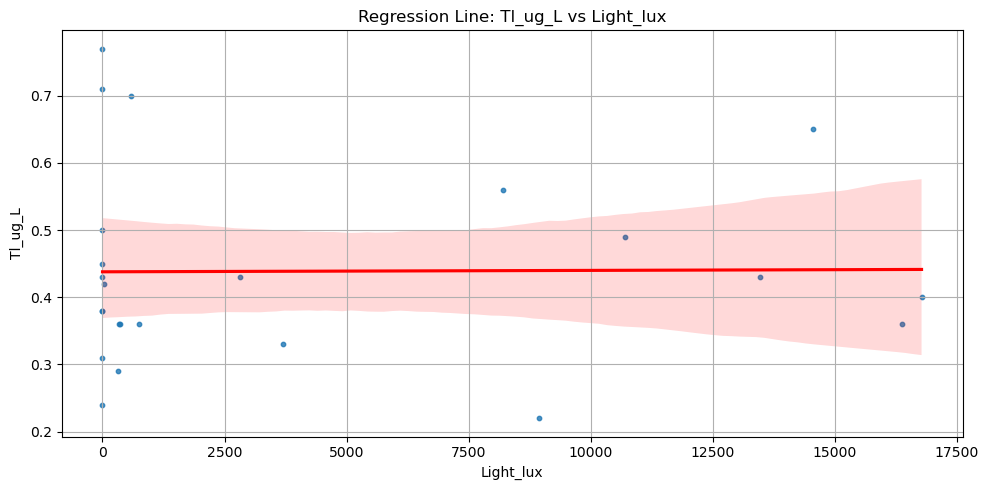

In [38]:
# List of specified variables for plotting against Light_lux
specified_columns_light_lux = [
    'Chlorophyll_RFU', 'Depth_m', 'fDOM_RFU', 'ODO_mg_L', 'SpCond_uS_cm', 'TAL_PC_RFU', 'pH', 
    'Turbidity_FNU', 'Temp_C', 'Ca_mg_L', 'Fe_mg_L', 'Mg_mg_L', 'K_mg_L', 'P_mg_L', 'Si_mg_L', 
    'Na_mg_L', 'S_mg_L', 'DIC_mg_L_C', 'DOC_mg_L_C', 'Sulfate_mg_L', 'Chloride_mg_L', 'Phosphate_mg_L', 
    'Al_ug_L', 'Sb_ug_L', 'As_ug_L', 'Ba_ug_L', 'Be_ug_L', 'Cd_ug_L', 'Cr_ug_L', 'Cu_ug_L', 'Mn_ug_L', 
    'Pb_ug_L', 'Se_ug_L', 'Tl_ug_L'
]

# Directory to save PNG images
# img_dir_light_lux = "202304_SL_LightLuxPlots"
# os.makedirs(img_dir_light_lux, exist_ok=True)

# Save each scatter plot with regression line as a PNG image
for col in specified_columns_light_lux:
    fig, ax = plt.subplots(figsize=(10, 5))
    sns.regplot(x='Light_lux', y=col, data=df, ax=ax, scatter_kws={'s': 10}, line_kws={'color': 'red'})
    ax.set_title(f'Regression Line: {col} vs Light_lux')
    ax.set_xlabel('Light_lux')
    ax.set_ylabel(col)
    ax.grid(True)
    # fig.savefig(os.path.join(img_dir_light_lux_reg, f"{col}_vs_LightLux_Regression.png"))
    plt.tight_layout()
    plt.show()
    plt.close(fig)

# Compress all PNG images into a ZIP file
# zip_file_path_light_lux_reg = "202304_SL_LightLuxPlots_Regression.zip"
# with zipfile.ZipFile(zip_file_path_light_lux_reg, 'w') as zipf:
  #  for root, _, files in os.walk(img_dir_light_lux_reg):
   #     for file in files:
     #       zipf.write(os.path.join(root, file), file)

# zip_file_path_light_lux_reg
